In [25]:
import sys
from h5_utils import h5disp, h5read
import prediction_utils
from correlation_metrics import get_split_half_correlation
import numpy as np
import os
from plot_utils import journal_figure
import matplotlib.pyplot as plt

In [26]:
nrImages = 1320

In [27]:
from decode_utils import decode, get_percent_correct_from_proba, get_fa, get_dprime

def create_i1_i2(model_features_):
    lb = ['bear','elephant','person','car','dog','apple','chair','plane','bird','zebra']
    labels = np.repeat(lb, 132,axis=0)
    i1 = np.zeros((nrImages,20), dtype=float) 
    i2 = np.zeros((20, nrImages,len(lb)), dtype=float) 
    dp_m = np.zeros((nrImages,20), dtype=float) 
    i1[:]=np.nan 
    i2[:]=np.nan 
    for j in range(20): 
        print('nrBS: '+str(j)) 
        p = decode(model_features_,labels, seed=j, nrfolds=3) 
        pc = get_percent_correct_from_proba(p,labels, np.array(lb)) 
        i1[:,j] = np.nanmean(pc, axis=1) 
        i2[j] = pc
    return i1, i2

In [4]:
def select_neurons(ev, selected_rates):  
    print(ev.shape, selected_rates.shape)  
    selected_rates = np.array(selected_rates[:, :ev.shape[0]])  
    best_neurons = selected_rates[:,ev > np.nanpercentile(ev, 80, axis=0)]  
    worst_neurons = selected_rates[:,ev < np.nanpercentile(ev, 20, axis=0)]  
    return best_neurons, worst_neurons

In [5]:
def load_model_features(model):
    path_map = {
        #"alexnet": "model_features/alexnet_features.npy",
        "alexnet_relu": "model_features/alexnet_features_layer_last.npy",
        "resnet": "model_features/resnet_features.npy",
        "resnet18": "model_features/resnet18_features.npy",
        "resnet18_ssl": "model_features/resnet18_ssl_features.npy",
        "resnet18_robust": "model_features/resnet18_robust_features.npy",
        "resnet_ssl": "model_features/resnet50_ssl_features.npy",
        "resnet_swsl": "model_features/resnet50_swsl_features.npy",
        "resnetSIN": "model_features/resnetSIN_features.npy",
        #"resnet152": "model_features/resnet152_features.npy",
        "resnet152_2": "model_features/resnet152_2_features.npy",
        "resnet101": "model_features/resnet101_features.npy",
        "resnet101_ssl": "model_features/resnet101_ssl_features.npy",
        "resnet_robust_eps1": "model_features/resnet_robust_eps1_features.npy",
        "resnet_robust_eps3": "model_features/resnet_robust_eps3_features.npy",
        "inception": "model_features/inceptionv3_features.npy",
        "inceptionv1": "model_features/inceptionv1_features.npy",
        "vit": "model_features/vit_features.npy",
        "vit_ssl": "model_features/vit_ssl_features.npy",
        "vgg16": "model_features/vgg16_features.npy",
        "vgg16_robust": "model_features/vgg16_robust_eps3_features.npy",
        "densenet": "model_features/densenet_features.npy",
        "densenet169": "model_features/densenet169_features.npy",
        "densenet161": "model_features/densenet161_features.npy",
        "densenet161_robust": "model_features/densenet161_robust_eps3_features.npy",
        "densenet121": "model_features/densenet121_features.npy",
        "convnext": "model_features/convnext_features.npy",
        "convnext_ssl": "model_features/convnext_ssl_features.npy",
        "mobilenet": "model_features/mobilenet_features.npy",
        "mobilenet_v2": "model_features/mobilenet_v2_features.npy",
        "mobilenet_robust": "model_features/mobilenet_robust_eps3_features.npy",
        "squeezenet": "model_features/squeezenet_features.npy",
        #"cornetS": "model_features/cornetS_features.npy",
        "cornetS_t0": "model_features/CORnet-S_muri1320_IT_output_feats_ts_0.npy",
        "cornetS_reg": "model_features/cornetS_regularized_features.npy",
        "cornetRT_t4": "model_features/CORnet-RT_muri1320_IT_output_feats_ts_4.npy",
        "nasnet": "model_features/nasnet_features.npy",
        "pnasnet": "model_features/pnasnet_features.npy",
        "swin": "model_features/swin_features.npy",
        "swin_ssl": "model_features/swin_ssl_features.npy",
        "shufflenet": "model_features/shufflenet_features.npy",
        "shufflenet_robust": "model_features/shufflenet_robust_features.npy",
    }
    if model not in path_map:
        raise ValueError("Model not found")
    features = np.load(path_map[model])
    return features.reshape((1320, -1))

In [6]:
full_model_list = ["alexnet_relu", "resnet18", "resnet18_robust", "resnet18_ssl", "resnet", "resnet_ssl", "resnet_swsl", "resnetSIN", "resnet152_2", "resnet101", "resnet101_ssl", "resnet_robust_eps1", "resnet_robust_eps3", "inception", "inceptionv1", "vit", "vit_ssl", "vgg16", "vgg16_robust", "densenet", "densenet169", "densenet161", "densenet161_robust", "densenet121", "convnext", "convnext_ssl", "mobilenet", "mobilenet_v2", "mobilenet_robust", "squeezenet", "cornetS_t0", "cornetS_reg", "cornetRT_t4", "nasnet", "pnasnet", "swin", "swin_ssl", "shufflenet", "shufflenet_robust"] #, "cornetS_reg"


In [ ]:
good_neurons_models_monkeys = {}
for model in full_model_list:
    features = load_model_features(model)
    good_neurons_models_monkeys[model] = {}
    for monkey in ["magneto", "nano"]:
        good_neurons_models_monkeys[model][monkey] = {}
        ev_per_neuron = np.load(f'./results_predictions/monkey2model/v4/{monkey}/ev_{model}.npy')
        best_neurons, worst_neurons = select_neurons(ev_per_neuron, features)
        good_neurons_models_monkeys[model][monkey]["good"] = best_neurons
        good_neurons_models_monkeys[model][monkey]["bad"] = worst_neurons


(4096,) (1320, 4096)
(4096,) (1320, 4096)
(25088,) (1320, 25088)
(25088,) (1320, 25088)
(25088,) (1320, 25088)
(25088,) (1320, 25088)
(25088,) (1320, 25088)
(25088,) (1320, 25088)
(100352,) (1320, 100352)
(100352,) (1320, 100352)
(100352,) (1320, 100352)
(100352,) (1320, 100352)
(100352,) (1320, 100352)
(100352,) (1320, 100352)
(100352,) (1320, 100352)
(100352,) (1320, 100352)
(200704,) (1320, 200704)
(200704,) (1320, 200704)
(200704,) (1320, 200704)
(200704,) (1320, 200704)
(200704,) (1320, 200704)
(200704,) (1320, 200704)
(100352,) (1320, 100352)
(100352,) (1320, 100352)
(100352,) (1320, 100352)
(100352,) (1320, 100352)


In [10]:
%%capture --no-display
i1s_models_monkeys = {}
for model in full_model_list:
    i1s_models_monkeys[model] = {}
    print(f"Processing model: {model}")
    for monkey in ["magneto", "nano"]:
        out_dir = f'./results_behavior/{model}/{monkey}/'
        if not os.path.exists(out_dir):
            os.makedirs(out_dir)
        if not os.path.exists(f'./results_behavior/{model}/{monkey}/i1_bad.npy'):
            i1s_models_monkeys[model][monkey] = {}
            good_neurons = good_neurons_models_monkeys[model][monkey]["good"]
            bad_neurons = good_neurons_models_monkeys[model][monkey]["bad"]
            
            if model != "alexnet_relu":
                proj = np.random.randn(good_neurons.shape[1], 813)
                good_neurons = np.dot(good_neurons, proj)
                bad_neurons = np.dot(bad_neurons, proj)

            i1_good, _ = create_i1_i2(good_neurons.T)
            i1_bad, _ = create_i1_i2(bad_neurons.T)

            np.save(f'./results_behavior/{model}/{monkey}/i1_good.npy', i1_good)
            np.save(f'./results_behavior/{model}/{monkey}/i1_bad.npy', i1_bad)

            i1s_models_monkeys[model][monkey]["good"] = i1_good
            i1s_models_monkeys[model][monkey]["bad"] = i1_bad

In [28]:
i1s_models_monkeys = {}
for model in full_model_list:
    print(f"Processing model: {model}")
    i1s_models_monkeys[model] = {}
    for monkey in ["magneto", "nano"]:
        i1s_models_monkeys[model][monkey] = {}
        i1_good = np.load(f'./results_behavior/{model}/{monkey}/i1_good.npy')
        i1_bad = np.load(f'./results_behavior/{model}/{monkey}/i1_bad.npy')
        i1s_models_monkeys[model][monkey]["good"] = i1_good
        i1s_models_monkeys[model][monkey]["bad"] = i1_bad

Processing model: alexnet_relu
Processing model: resnet18
Processing model: resnet18_robust
Processing model: resnet18_ssl
Processing model: resnet
Processing model: resnet_ssl
Processing model: resnet_swsl
Processing model: resnetSIN
Processing model: resnet152_2
Processing model: resnet101
Processing model: resnet101_ssl
Processing model: resnet_robust_eps1
Processing model: resnet_robust_eps3
Processing model: inception
Processing model: inceptionv1
Processing model: vit
Processing model: vit_ssl
Processing model: vgg16
Processing model: vgg16_robust
Processing model: densenet
Processing model: densenet169
Processing model: densenet161
Processing model: densenet161_robust
Processing model: densenet121
Processing model: convnext
Processing model: convnext_ssl
Processing model: mobilenet
Processing model: mobilenet_v2
Processing model: mobilenet_robust
Processing model: squeezenet
Processing model: cornetS_t0
Processing model: cornetS_reg
Processing model: cornetRT_t4
Processing model

In [11]:
%%capture --no-display
for model in full_model_list:
    if not os.path.exists(f'./results_behavior/{model}/{monkey}/i1_all.npy'):
        features = load_model_features(model)
        proj = np.random.randn(features.shape[1], 813)
        features = np.dot(features, proj)
        i1_all, _ = create_i1_i2(features.T)
        np.save(f'./results_behavior/{model}/{monkey}/i1_all.npy', i1_all)

In [ ]:
ls ../tools/feature_extraction/static_images/output_features/behavior/

Administratif/                         Personnel.ics
Direct Deposit Form (PDF).pdf          Photos/
Family/                                Ping/
Finale/                                Stage Brown/
Finale.rar                             Thesis/
KOHITIJ KAR 79AAMP 01AUG 2130 CCU.pdf  Work/
Livres/                                Zoom/
M2 IARF Mac/                           data/
Obsidian Vault/                        regressi.doc
Paradox Interactive/                   results-imagenet.csv


In [38]:
%%capture --no-display
for model in full_model_list:
    if "cornet" not in model:
        
        print(f"Processing model: {model}")
        features_behavior = np.load(f"../tools/feature_extraction/static_images/output_features/behavior/{model}.npy").reshape((1320, -1))

        proj = np.random.randn(features_behavior.shape[1], 813)
        features_behavior = np.dot(features_behavior, proj)
        i1_all, _ = create_i1_i2(features_behavior.T)
        np.save(f'./results_behavior/{model}/behavior_i1.npy', i1_all)

In [67]:
import distinctipy
colors = distinctipy.get_colors(len(full_model_list))

In [39]:
def compute_correlation(d1, d2):
    rand_r1 = np.random.choice(20, size=20, replace=True)
    rand_r2 = np.random.choice(20, size=20, replace=True)
    corrs_i1 = [
        pearsonr(d1[:,r1], d2[:, r2])[0] for r1, r2 in zip(rand_r1, rand_r2)
    ]
    mean_corr = np.nanmean(corrs_i1)
    std_corr = np.nanstd(corrs_i1)
    return mean_corr, std_corr, corrs_i1

def compute_all_correlations(i1_model_best, i1_model_worst, i1_b, ceiling_b=1.0):
    corr_best_m, corr_best_std, corrs_i1_best = compute_correlation(i1_b, i1_model_best)
    corr_worst_m, corr_worst_std, corrs_i1_worst = compute_correlation(i1_b, i1_model_worst)

    corr_best_m_corr = corr_best_m/np.sqrt(ceiling_b)
    corr_worst_m_corr = corr_worst_m/np.sqrt(ceiling_b)

    return corr_best_m_corr, corr_worst_m_corr, corrs_i1_best, corrs_i1_worst

In [40]:
from scipy.stats import spearmanr, pearsonr

In [41]:
from scipy.stats import median_abs_deviation as mad
def nanmad(var):
    return mad(np.nan_to_num(var))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


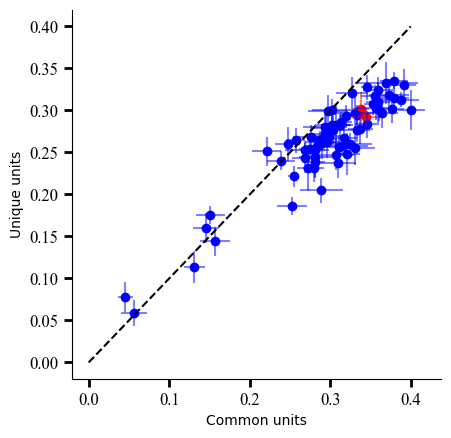

In [117]:
model = "resnet"
all_corrs_i1_best = []
all_corrs_i1_worst = []

delta_others = []
for model2 in full_model_list:
    if "cornet" not in model2:
        for monkey in ["magneto", "nano"]:
            i1_good = i1s_models_monkeys[model][monkey]["good"]
            i1_bad = i1s_models_monkeys[model][monkey]["bad"]

            i1_behavior = np.load(f'./results_behavior/{model2}/behavior_i1.npy')

            corr_best, corr_worst, corrs_i1_best, corrs_i1_worst  = compute_all_correlations(i1_good, i1_bad, i1_behavior)
            if model != model2:
                delta_others.append(np.nanmean(corrs_i1_best) - np.nanmean(corrs_i1_worst))

            if model == model2:
                color = "red"
                plt.scatter(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), label=model, color=color)
                plt.errorbar(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), 
                            xerr=nanmad(corrs_i1_best), yerr=nanmad(corrs_i1_worst), color=color, alpha=0.5)
            else:
                color = "blue"
                plt.scatter(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), label=model, color=color)
                plt.errorbar(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), 
                            xerr=nanmad(corrs_i1_best), yerr=nanmad(corrs_i1_worst), color=color, alpha=0.5)
            if model != model2:
                all_corrs_i1_best.append(np.nanmean(corrs_i1_best))
                all_corrs_i1_worst.append(np.nanmean(corrs_i1_worst))

plt.plot([0, 0.4], [0, 0.4], color='black', linestyle='--')
plt.xlabel("Common units")
plt.ylabel("Unique units")
journal_figure()
plt.savefig(f"./results_behavior/correlation_{model}_behavior.eps", dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


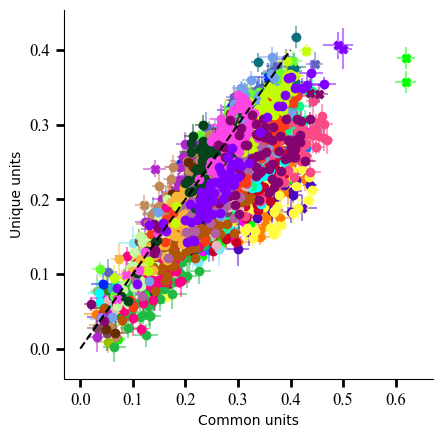

In [116]:
#model = "resnet"
for i, model in enumerate(full_model_list):
    all_corrs_i1_best = []
    all_corrs_i1_worst = []

    delta_others = []
    for model2 in full_model_list:
        if "cornet" not in model2:
            for monkey in ["magneto", "nano"]:
                i1_good = i1s_models_monkeys[model][monkey]["good"]
                i1_bad = i1s_models_monkeys[model][monkey]["bad"]

                i1_behavior = np.load(f'./results_behavior/{model2}/behavior_i1.npy')

                corr_best, corr_worst, corrs_i1_best, corrs_i1_worst  = compute_all_correlations(i1_good, i1_bad, i1_behavior)
                if model != model2:
                    delta_others.append(np.nanmean(corrs_i1_best) - np.nanmean(corrs_i1_worst))

                if model == model2:
                    color = "red"
                    plt.scatter(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), label=model, color=colors[i], zorder=10, marker="X")
                    plt.errorbar(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), 
                                xerr=nanmad(corrs_i1_best), yerr=nanmad(corrs_i1_worst), color=colors[i], alpha=0.5, zorder=0)
                else:
                    color = "blue"
                    plt.scatter(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), label=model, color=colors[i], zorder=10)
                    plt.errorbar(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), 
                                xerr=nanmad(corrs_i1_best), yerr=nanmad(corrs_i1_worst), color=colors[i], alpha=0.5, zorder=0)
                if model != model2:
                    all_corrs_i1_best.append(np.nanmean(corrs_i1_best))
                    all_corrs_i1_worst.append(np.nanmean(corrs_i1_worst))

plt.plot([0, 0.4], [0, 0.4], color='black', linestyle='--', zorder=10)
#plt.scatter(np.nanmean(all_corrs_i1_best), np.nanmean(all_corrs_i1_worst), color="green")
plt.xlabel("Common units")
plt.ylabel("Unique units")
journal_figure()
plt.savefig(f"./results_behavior/correlation_all_models_behavior.eps", dpi=300)

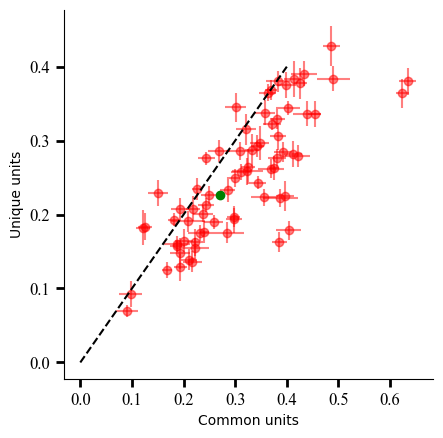

In [ ]:
for model in full_model_list:
    if "cornet" not in model:
        all_corrs_i1_best = []
        all_corrs_i1_worst = []

        delta_others = []
        for model2 in full_model_list:
            if "cornet" not in model2:
                for monkey in ["magneto", "nano"]:
                    i1_good = i1s_models_monkeys[model][monkey]["good"]
                    i1_bad = i1s_models_monkeys[model][monkey]["bad"]

                    i1_behavior = np.load(f'./results_behavior/{model2}/behavior_i1.npy')

                    corr_best, corr_worst, corrs_i1_best, corrs_i1_worst  = compute_all_correlations(i1_good, i1_bad, i1_behavior)
                    if model != model2:
                        delta_others.append(np.nanmean(corrs_i1_best) - np.nanmean(corrs_i1_worst))

                    if model == model2:
                        color = "red"
                        plt.scatter(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), label=model, color=color, alpha=0.5)
                        plt.errorbar(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), 
                                    xerr=nanmad(corrs_i1_best), yerr=nanmad(corrs_i1_worst), color=color, alpha=0.5)
                    else:
                        color = "blue"
                        # plt.scatter(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), label=model, color=color, alpha=0.5)
                        # plt.errorbar(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), 
                        #             xerr=nanmad(corrs_i1_best), yerr=nanmad(corrs_i1_worst), color=color, alpha=0.5)
                    if model != model2:
                        all_corrs_i1_best.append(np.nanmean(corrs_i1_best))
                        all_corrs_i1_worst.append(np.nanmean(corrs_i1_worst))
            plt.scatter(np.nanmean(all_corrs_i1_best), np.nanmean(all_corrs_i1_worst), color="green")

plt.plot([0, 0.4], [0, 0.4], color='black', linestyle='--')

plt.xlabel("Common units")
plt.ylabel("Unique units")
journal_figure()

In [99]:
delta_within = []
delta_between = []
for model in full_model_list:
    if "cornet" not in model:
        all_corrs_i1_best = []
        all_corrs_i1_worst = []

        delta_others = []
        for model2 in full_model_list:
            temp_delta = []
            if "cornet" not in model2:
                for monkey in ["magneto", "nano"]:
                    i1_good = i1s_models_monkeys[model][monkey]["good"]
                    i1_bad = i1s_models_monkeys[model][monkey]["bad"]

                    i1_behavior = np.load(f'./results_behavior/{model2}/behavior_i1.npy')

                    corr_best, corr_worst, corrs_i1_best, corrs_i1_worst  = compute_all_correlations(i1_good, i1_bad, i1_behavior)
                    if model != model2:
                        delta_others.append(np.nanmean(corrs_i1_best) - np.nanmean(corrs_i1_worst))

                    if model == model2:
                        color = "red"
                        # plt.scatter(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), label=model, color=color, alpha=0.5)
                        # plt.errorbar(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), 
                        #             xerr=nanmad(corrs_i1_best), yerr=nanmad(corrs_i1_worst), color=color, alpha=0.5)
                        temp_delta.append(np.nanmean(corrs_i1_best) - np.nanmean(corrs_i1_worst))
            temp_delta = np.array(temp_delta)
            temp_delta = np.nanmean(temp_delta)
            delta_within.append(temp_delta)
        delta_others = np.array(delta_others)
        delta_between.append(np.nanmean(delta_others))

/var/folders/h2/8tj3snsd0wj1qzvdlg5_17y00000gn/T/ipykernel_48606/703546455.py:29: RuntimeWarning: Mean of empty slice
  temp_delta = np.nanmean(temp_delta)


In [102]:
np.array(delta_between).shape, np.array(delta_within).shape

((36,), (36,))

In [101]:
# remove nans in delta within
delta_within = [d for d in delta_within if not np.isnan(d)]

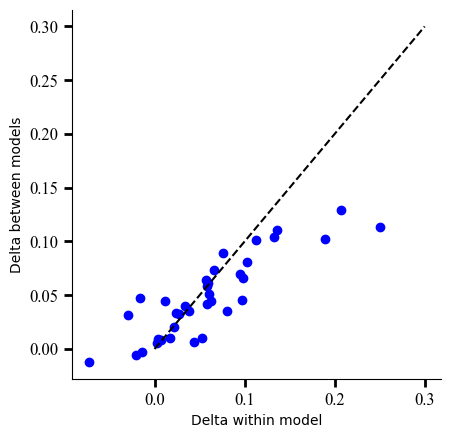

In [104]:
plt.scatter(delta_within, delta_between, color="blue")
plt.plot([0, 0.3], [0, 0.3], color='black', linestyle='--')
plt.xlabel("Delta within model")
plt.ylabel("Delta between models")
journal_figure()

In [83]:
delta_others = np.array(delta_others)
np.nanmean(delta_others)

np.float64(0.03504721320189043)

In [107]:
delta_within = []
delta_between = []
for model in full_model_list:
    if "cornet" not in model:
        all_corrs_i1_best = []
        all_corrs_i1_worst = []

        delta_others = []
        for model2 in full_model_list:
            temp_delta = []
            if "cornet" not in model2:
                for monkey in ["magneto", "nano"]:
                    i1_good = i1s_models_monkeys[model][monkey]["good"]
                    i1_bad = i1s_models_monkeys[model][monkey]["bad"]

                    i1_behavior = np.load(f'./results_behavior/{model2}/behavior_i1.npy')

                    corr_best, corr_worst, corrs_i1_best, corrs_i1_worst  = compute_all_correlations(i1_good, i1_bad, i1_behavior)
                    if model != model2:
                        delta_others.append(np.nanmean(corrs_i1_worst))

                    if model == model2:
                        color = "red"
                        # plt.scatter(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), label=model, color=color, alpha=0.5)
                        # plt.errorbar(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), 
                        #             xerr=nanmad(corrs_i1_best), yerr=nanmad(corrs_i1_worst), color=color, alpha=0.5)
                        temp_delta.append(np.nanmean(corrs_i1_worst))
            temp_delta = np.array(temp_delta)
            temp_delta = np.nanmean(temp_delta)
            delta_within.append(temp_delta)
        delta_others = np.array(delta_others)
        delta_between.append(np.nanmean(delta_others))

/var/folders/h2/8tj3snsd0wj1qzvdlg5_17y00000gn/T/ipykernel_48606/1614679932.py:29: RuntimeWarning: Mean of empty slice
  temp_delta = np.nanmean(temp_delta)


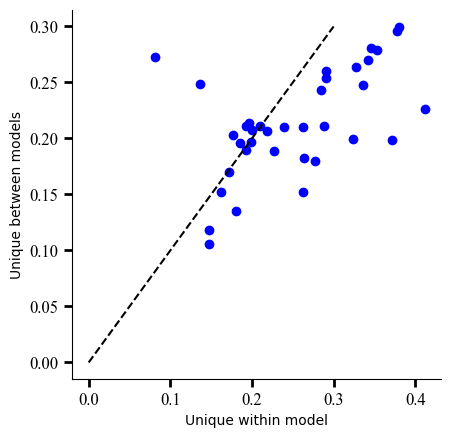

In [108]:
delta_within = [d for d in delta_within if not np.isnan(d)]
plt.scatter(delta_within, delta_between, color="blue")
plt.plot([0, 0.3], [0, 0.3], color='black', linestyle='--')
plt.xlabel("Unique within model")
plt.ylabel("Unique between models")
journal_figure()

In [109]:
delta_within = []
delta_between = []
for model in full_model_list:
    if "cornet" not in model:
        all_corrs_i1_best = []
        all_corrs_i1_worst = []

        delta_others = []
        for model2 in full_model_list:
            temp_delta = []
            if "cornet" not in model2:
                for monkey in ["magneto", "nano"]:
                    i1_good = i1s_models_monkeys[model][monkey]["good"]
                    i1_bad = i1s_models_monkeys[model][monkey]["bad"]

                    i1_behavior = np.load(f'./results_behavior/{model2}/behavior_i1.npy')

                    corr_best, corr_worst, corrs_i1_best, corrs_i1_worst  = compute_all_correlations(i1_good, i1_bad, i1_behavior)
                    if model != model2:
                        delta_others.append(np.nanmean(corrs_i1_best))

                    if model == model2:
                        color = "red"
                        # plt.scatter(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), label=model, color=color, alpha=0.5)
                        # plt.errorbar(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), 
                        #             xerr=nanmad(corrs_i1_best), yerr=nanmad(corrs_i1_worst), color=color, alpha=0.5)
                        temp_delta.append(np.nanmean(corrs_i1_best))
            temp_delta = np.array(temp_delta)
            temp_delta = np.nanmean(temp_delta)
            delta_within.append(temp_delta)
        delta_others = np.array(delta_others)
        delta_between.append(np.nanmean(delta_others))

/var/folders/h2/8tj3snsd0wj1qzvdlg5_17y00000gn/T/ipykernel_48606/2082788684.py:29: RuntimeWarning: Mean of empty slice
  temp_delta = np.nanmean(temp_delta)


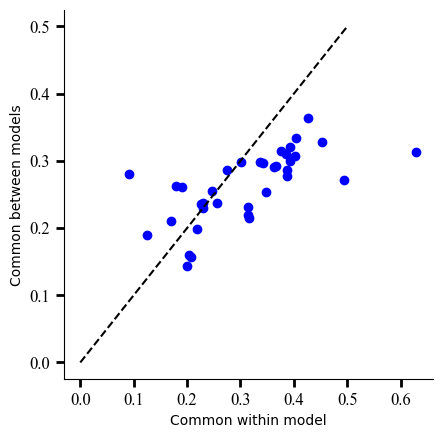

In [111]:
delta_within = [d for d in delta_within if not np.isnan(d)]
plt.scatter(delta_within, delta_between, color="blue")
plt.plot([0, 0.5], [0, 0.5], color='black', linestyle='--')
plt.xlabel("Common within model")
plt.ylabel("Common between models")
journal_figure()

In [ ]:
delta_within = []
delta_between = []
for model in full_model_list:
    if "cornet" not in model:
        all_corrs_i1_best = []
        all_corrs_i1_worst = []

        delta_others = []
        for model2 in full_model_list:
            temp_delta = []
            if "cornet" not in model2:
                for monkey in ["magneto", "nano"]:
                    i1_good = i1s_models_monkeys[model][monkey]["good"]
                    i1_bad = i1s_models_monkeys[model][monkey]["bad"]

                    i1_behavior = np.load(f'./results_behavior/{model2}/behavior_i1.npy')

                    corr_best, corr_worst, corrs_i1_best, corrs_i1_worst  = compute_all_correlations(i1_good, i1_bad, i1_behavior)
                    if model != model2:
                        delta_others.append(np.nanmean(corrs_i1_worst))

                    if model == model2:
                        color = "red"
                        # plt.scatter(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), label=model, color=color, alpha=0.5)
                        # plt.errorbar(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), 
                        #             xerr=nanmad(corrs_i1_best), yerr=nanmad(corrs_i1_worst), color=color, alpha=0.5)
                        temp_delta.append(np.nanmean(corrs_i1_worst))
            temp_delta = np.array(temp_delta)
            temp_delta = np.nanmean(temp_delta)
            delta_within.append(temp_delta)
        delta_others = np.array(delta_others)
        delta_between.append(np.nanmean(delta_others))

In [50]:
import scipy.stats as stats
stats.shapiro(all_corrs_i1_best), stats.shapiro(all_corrs_i1_worst)

(ShapiroResult(statistic=np.float64(0.8694403831156684), pvalue=np.float64(2.2274544828991853e-06)),
 ShapiroResult(statistic=np.float64(0.830486105314744), pvalue=np.float64(1.2502781394307048e-07)))

In [51]:
def print_wilcoxon(commons, uniques):
    stat, p = stats.wilcoxon(commons, uniques)
    dof = len(commons) - 1
    print(f"W({dof}) = {stat}, p = {p}")
    if p < 0.05:
        print("The distributions are significantly different.")
    else:
        print("The distributions are not significantly different.")
print_wilcoxon(all_corrs_i1_best, all_corrs_i1_worst)

W(71) = 139.0, p = 4.2888298784836784e-11
The distributions are significantly different.


In [47]:
def print_ttest(commons, uniques):
    stat, p = stats.ttest_rel(commons, uniques)
    dof = len(commons) - 1
    print(f"t({dof}) = {stat}, p = {p}")
    if p < 0.05:
        print("The distributions are significantly different.")
    else:
        print("The distributions are not significantly different.")

In [48]:
print_ttest(corrs_i1_best, corrs_i1_worst)

t(19) = 4.486230453861044, p = 0.0002529677738906334
The distributions are significantly different.


In [75]:
import distinctipy
colors = distinctipy.get_colors(len(full_model_list))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


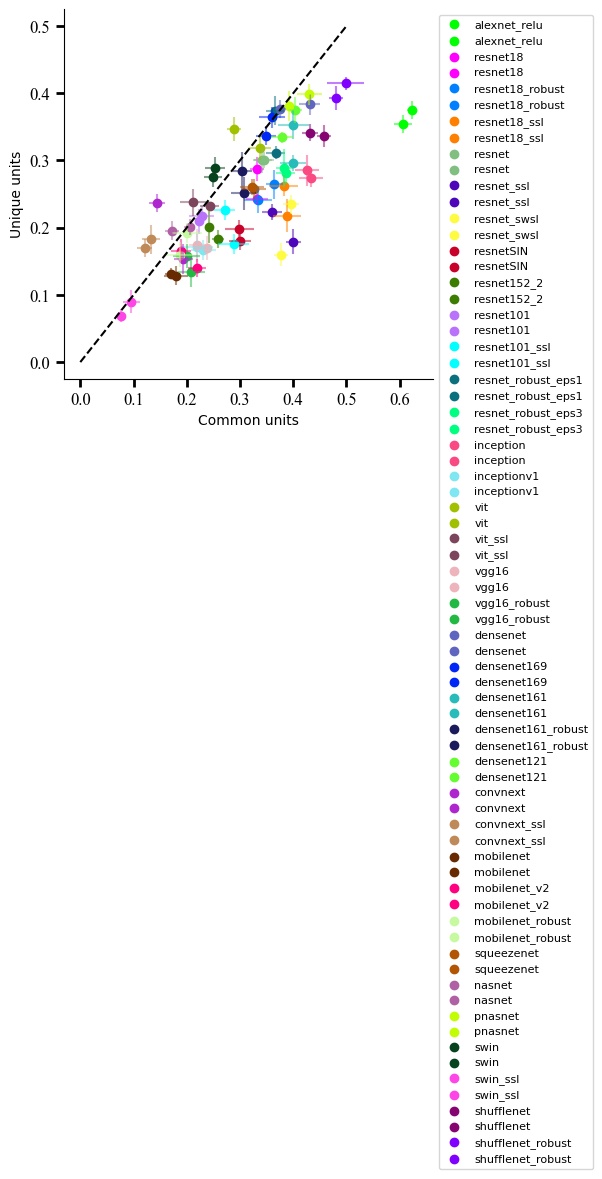

In [80]:
all_corrs_i1_best = []
all_corrs_i1_worst = []
for i, model in enumerate(full_model_list):
    if "cornet" not in model:
        for monkey in ["magneto", "nano"]:
            i1_good = i1s_models_monkeys[model][monkey]["good"]
            i1_bad = i1s_models_monkeys[model][monkey]["bad"]

            i1_behavior = np.load(f'./results_behavior/{model}/behavior_i1.npy')

            corr_best, corr_worst, corrs_i1_best, corrs_i1_worst  = compute_all_correlations(i1_good, i1_bad, i1_behavior)

            color = "blue"
            plt.scatter(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), label=model, color=colors[i])
            plt.errorbar(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), 
                        xerr=nanmad(corrs_i1_best), yerr=nanmad(corrs_i1_worst), color=colors[i], alpha=0.5)
            all_corrs_i1_best.append(np.nanmean(corrs_i1_best))
            all_corrs_i1_worst.append(np.nanmean(corrs_i1_worst))
plt.plot([0, 0.5], [0, 0.5], color='black', linestyle='--')
plt.xlabel("Common units")
plt.ylabel("Unique units")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
journal_figure()
plt.savefig(f"./figures/plots_v2/correlation_all_behavior.eps", dpi=300, bbox_inches='tight')

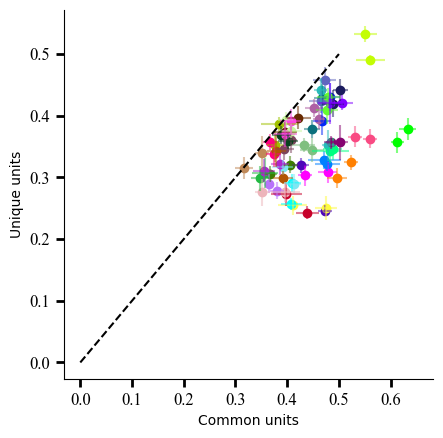

In [77]:
all_corrs_i1_best = []
all_corrs_i1_worst = []
for i, model in enumerate(full_model_list):
    if "cornet" not in model:
        for monkey in ["magneto", "nano"]:
            i1_good = i1s_models_monkeys[model][monkey]["good"]
            i1_bad = i1s_models_monkeys[model][monkey]["bad"]

            i1_behavior = np.load(f'./results_behavior/{model}/nano/i1_all.npy')

            corr_best, corr_worst, corrs_i1_best, corrs_i1_worst  = compute_all_correlations(i1_good, i1_bad, i1_behavior)

            color = "blue"
            plt.scatter(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), label=model, color=colors[i])
            plt.errorbar(np.nanmean(corrs_i1_best), np.nanmean(corrs_i1_worst), 
                        xerr=nanmad(corrs_i1_best), yerr=nanmad(corrs_i1_worst), color=colors[i], alpha=0.5)
            all_corrs_i1_best.append(np.nanmean(corrs_i1_best))
            all_corrs_i1_worst.append(np.nanmean(corrs_i1_worst))
plt.plot([0, 0.5], [0, 0.5], color='black', linestyle='--')
plt.xlabel("Common units")
plt.ylabel("Unique units")
journal_figure()
#plt.savefig(f"./results_behavior/correlation_all_behavior.eps", dpi=300)

In [57]:
stats.shapiro(all_corrs_i1_best), stats.shapiro(all_corrs_i1_worst)

(ShapiroResult(statistic=np.float64(0.9921665096075625), pvalue=np.float64(3.252964446127605e-11)),
 ShapiroResult(statistic=np.float64(0.9962200095196354), pvalue=np.float64(1.6159764400085992e-06)))

In [58]:
print_wilcoxon(all_corrs_i1_best, all_corrs_i1_worst)

W(2807) = 269065.0, p = 0.0
The distributions are significantly different.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


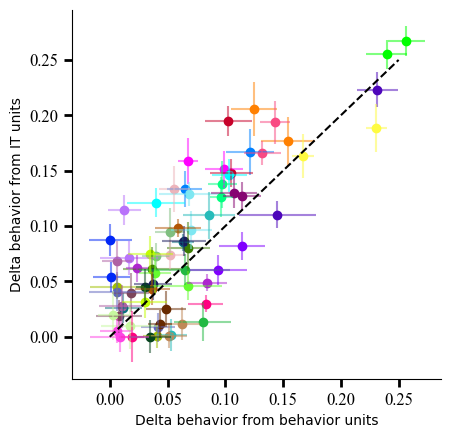

In [78]:
deltas1 = []
deltas2 = []
for i, model in enumerate(full_model_list):
    if "cornet" not in model:
        for monkey in ["magneto", "nano"]:
            i1_good = i1s_models_monkeys[model][monkey]["good"]
            i1_bad = i1s_models_monkeys[model][monkey]["bad"]

            i1_behavior = np.load(f'./results_behavior/{model}/behavior_i1.npy')

            corr_best, corr_worst, corrs_i1_best, corrs_i1_worst  = compute_all_correlations(i1_good, i1_bad, i1_behavior)

            i1_behavior = np.load(f'./results_behavior/{model}/nano/i1_all.npy')

            corr_best2, corr_worst2, corrs_i1_best2, corrs_i1_worst2  = compute_all_correlations(i1_good, i1_bad, i1_behavior)
            #compute distance from the diagonal
            delta1 = np.abs(corr_best - corr_worst)
            delta2 = np.abs(corr_best2 - corr_worst2)

            deltas1.append(delta1)
            deltas2.append(delta2)

            color = "blue"
            plt.scatter(delta1, delta2, label=model, color=colors[i])
            plt.errorbar(delta1, delta2, 
                        xerr=nanmad(corrs_i1_best), yerr=nanmad(corrs_i1_worst), color=colors[i], alpha=0.5)

plt.plot([0, 0.25], [0, 0.25], color='black', linestyle='--')
plt.ylabel("Delta behavior from IT units")
plt.xlabel("Delta behavior from behavior units")
journal_figure()
plt.savefig(f"./figures/plots_v2/delta_behavior.eps", dpi=300)

In [ ]:
deltas1 = []
deltas2 = []
for i, model in enumerate(full_model_list):
    if "cornet" not in model:
        for monkey in ["magneto", "nano"]:
            i1_good = i1s_models_monkeys[model][monkey]["good"]
            i1_bad = i1s_models_monkeys[model][monkey]["bad"]

            i1_behavior = np.load(f'./results_behavior/{model}/behavior_i1.npy')

            corr_best, corr_worst, corrs_i1_best, corrs_i1_worst  = compute_all_correlations(i1_good, i1_bad, i1_behavior)

            i1_behavior = np.load(f'./results_behavior/{model}/nano/i1_all.npy')

            corr_best2, corr_worst2, corrs_i1_best2, corrs_i1_worst2  = compute_all_correlations(i1_good, i1_bad, i1_behavior)
            #compute distance from the diagonal
            delta1 = np.abs(corr_best - corr_worst)
            delta2 = np.abs(corr_best2 - corr_worst2)

            deltas1.append(delta1)
            deltas2.append(delta2)

            color = "blue"
            plt.scatter(delta1, delta2, label=model, color=colors[i])
            plt.errorbar(delta1, delta2, 
                        xerr=nanmad(corrs_i1_best), yerr=nanmad(corrs_i1_worst), color=colors[i], alpha=0.5)

plt.plot([0, 0.25], [0, 0.25], color='black', linestyle='--')
plt.ylabel("Delta behavior from IT units")
plt.xlabel("Delta behavior from behavior units")
journal_figure()
plt.savefig(f"./figures/plots_v2/delta_behavior.eps", dpi=300)

In [72]:
stats.shapiro(deltas1), stats.shapiro(deltas2)

(ShapiroResult(statistic=np.float64(0.853202354173445), pvalue=np.float64(6.353768590186175e-07)),
 ShapiroResult(statistic=np.float64(0.9216169090095894), pvalue=np.float64(0.0002529353286120302)))

In [73]:
print_wilcoxon(deltas1, deltas2)

W(71) = 691.0, p = 0.00047213820362309835
The distributions are significantly different.


In [71]:
corrs_models_monkeys = {}

for model in full_model_list:
    corrs_models_monkeys[model] = {}
    for monkey in ["magneto", "nano"]:
        corrs_models_monkeys[model][monkey] = {}
        i1_good = i1s_models_monkeys[model][monkey]["good"]
        i1_bad = i1s_models_monkeys[model][monkey]["bad"]
        
        for model2 in full_model_list:
            corrs_models_monkeys[model][monkey][model2] = {}
            
            i1_m = np.load(f'./results_behavior/{model}/nano/i1_all.npy')

            corr_best, corr_worst, corrs_i1_best, corrs_i1_worst  = compute_all_correlations(i1_good, i1_bad, i1_m)
            corrs_models_monkeys[model][monkey][model2]["good"] = corrs_i1_best
            corrs_models_monkeys[model][monkey][model2]["bad"] = corrs_i1_worst

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


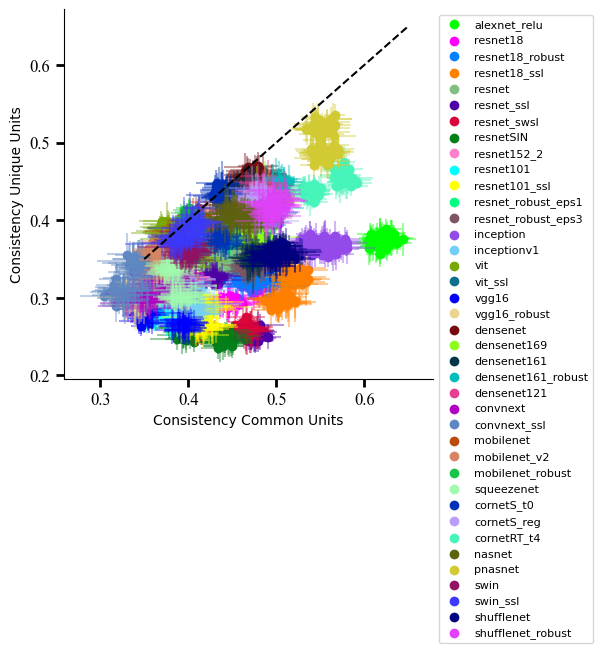

In [82]:
i=0

for model in full_model_list:
    for monkey in ["magneto", "nano"]:
        for model2 in full_model_list:
            plt.errorbar(np.nanmean(corrs_models_monkeys[model][monkey][model2]["good"]), np.nanmean(corrs_models_monkeys[model][monkey][model2]["bad"]), xerr=nanmad(corrs_models_monkeys[model][monkey][model2]["good"]), yerr=nanmad(corrs_models_monkeys[model][monkey][model2]["bad"]), color=colors[i], alpha=0.4)
            plt.scatter(np.nanmean(corrs_models_monkeys[model][monkey][model2]["good"]), np.nanmean(corrs_models_monkeys[model][monkey][model2]["bad"]), color=colors[i], label=model if (monkey == "magneto" and model2 == "alexnet_relu") else None)
    i+=1
plt.plot([0.35, 0.65], [0.35, 0.65], color="black", linestyle='--')
plt.xlabel("Consistency Common Units")
plt.ylabel("Consistency Unique Units")
journal_figure()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
plt.savefig("figures/plots_v2/plots_behavior_all_models_legend.eps", bbox_inches='tight')


In [73]:
from scipy.stats import median_abs_deviation as mad
def nanmad(var):
    return mad(np.nan_to_num(var))

In [159]:
import matplotlib.cm as cm
n_colors = len(full_model_list)
blues = cm.get_cmap("Blues", n_colors)
colors = [blues(i) for i in range(n_colors)]

/var/folders/h2/8tj3snsd0wj1qzvdlg5_17y00000gn/T/ipykernel_915/3696622267.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = cm.get_cmap("Blues", n_colors)


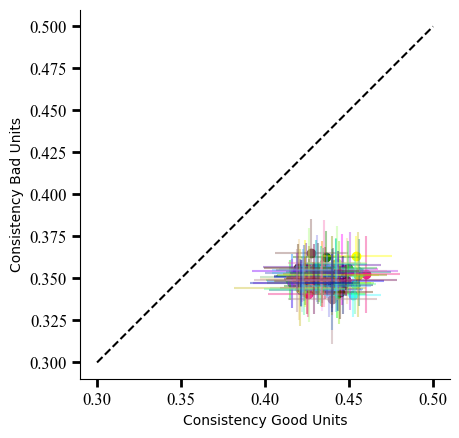

In [20]:
commons = []
uniques = []
for model in ['resnet']:
    i=0
    for model2 in full_model_list:
        for monkey in ["magneto", "nano"]:
            plt.errorbar(np.nanmean(corrs_models_monkeys[model][monkey][model2]["good"]), np.nanmean(corrs_models_monkeys[model][monkey][model2]["bad"]), xerr=nanmad(corrs_models_monkeys[model][monkey][model2]["good"]), yerr=nanmad(corrs_models_monkeys[model][monkey][model2]["bad"]), color=colors[i], alpha=0.4)
            plt.scatter(np.nanmean(corrs_models_monkeys[model][monkey][model2]["good"]), np.nanmean(corrs_models_monkeys[model][monkey][model2]["bad"]), color=colors[i])
            commons.append(np.nanmean(corrs_models_monkeys[model][monkey][model2]["good"]))
            uniques.append(np.nanmean(corrs_models_monkeys[model][monkey][model2]["bad"]))
        i+=1
plt.plot([0.3, 0.5], [0.3, 0.5], color="black", linestyle='--')
plt.xlabel("Consistency Good Units")
plt.ylabel("Consistency Bad Units")
journal_figure()
#plt.savefig("figures/plots_v2/plots_behavior_resnet.eps")

In [21]:
import scipy.stats as stats
stats.shapiro(commons), stats.shapiro(uniques)

(ShapiroResult(statistic=np.float64(0.9650218198873481), pvalue=np.float64(0.030678502981599742)),
 ShapiroResult(statistic=np.float64(0.992760748247025), pvalue=np.float64(0.9424419672143055)))

In [24]:
def print_wilcoxon(commons, uniques):
    stat, p = stats.wilcoxon(commons, uniques, alternative='greater')
    print(f"Z = {stat}, p = {p}")
    if p < 0.05:
        print("The distributions are significantly different.")
    else:
        print("The distributions are not significantly different.")

In [25]:
print_wilcoxon(commons, uniques)

Z = 3081.0, p = 8.410875224353284e-15
The distributions are significantly different.


In [26]:
np.nanmedian(np.array(commons)), np.nanmedian(np.array(uniques)), nanmad(np.array(commons)), nanmad(np.array(uniques))

(np.float64(0.43383855317154396),
 np.float64(0.35094215035116194),
 np.float64(0.009271856146097823),
 np.float64(0.00355917016896673))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


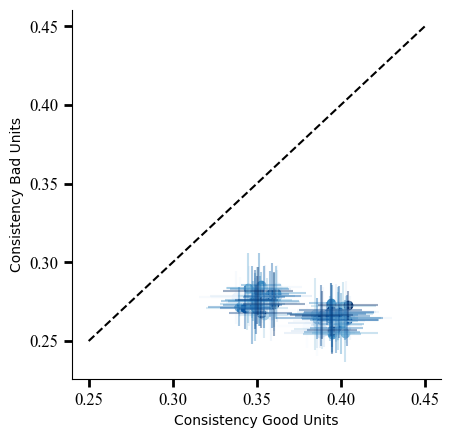

In [36]:


for model in ['vgg16']:
    i=0
    for model2 in full_model_list:
        for monkey in ["magneto", "nano"]:
            plt.errorbar(np.nanmean(corrs_models_monkeys[model][monkey][model2]["good"]), np.nanmean(corrs_models_monkeys[model][monkey][model2]["bad"]), xerr=nanmad(corrs_models_monkeys[model][monkey][model2]["good"]), yerr=nanmad(corrs_models_monkeys[model][monkey][model2]["bad"]), color=colors[i], alpha=0.4)
            plt.scatter(np.nanmean(corrs_models_monkeys[model][monkey][model2]["good"]), np.nanmean(corrs_models_monkeys[model][monkey][model2]["bad"]), color=colors[i])
        i+=1
plt.plot([0.25, 0.45], [0.25, 0.45], color="black", linestyle='--')
plt.xlabel("Consistency Good Units")
plt.ylabel("Consistency Bad Units")
journal_figure()
plt.savefig("figures/plots_v2/plots_behavior_vgg16.eps")

In [27]:
mean_corrs_models_monkeys = {}
std_corrs_models_monkeys = {}
for model in full_model_list:
    mean_corrs_models_monkeys[model] = {}
    std_corrs_models_monkeys[model] = {}
    for monkey in ["magneto", "nano"]:
        mean_corrs_models_monkeys[model][monkey] = {}
        std_corrs_models_monkeys[model][monkey] = {}
        temp_g = []
        temp_b = []
        for model2 in full_model_list:
            temp_g.append(np.array(corrs_models_monkeys[model][monkey][model2]["good"]).mean())
            temp_b.append(np.array(corrs_models_monkeys[model][monkey][model2]["bad"]).mean())
        
        mean_corrs_models_monkeys[model][monkey]["good"] = np.array(temp_g).mean()
        mean_corrs_models_monkeys[model][monkey]["bad"] = np.array(temp_b).mean()

        std_corrs_models_monkeys[model][monkey]["good"] = nanmad(np.array(temp_g))
        std_corrs_models_monkeys[model][monkey]["bad"] = nanmad(np.array(temp_b))

In [118]:
b_nano = np.load("./results_behavior/i1_nano.npy")
b_magneto = np.load("./results_behavior/i1_magneto.npy")
b_bento = np.load("./results_behavior/i1_bento.npy")
b_human = np.load("./results_behavior/i1_human.npy")



In [119]:
def compute_correlation_monkeys(d1, d2):  
    rand_r1 = np.random.choice(20, size=20, replace=True)  
    rand_r2 = np.random.choice(20, size=20, replace=True)  
    corrs_i1 = [  
        pearsonr(d1[:], d2[:, r2])[0]  
        for r1, r2 in zip(rand_r1, rand_r2)  
        ]  
    mean_corr = np.nanmean(corrs_i1)  
    std_corr = np.nanmean(corrs_i1)/np.sqrt(1320)  
    return mean_corr, std_corr, corrs_i1  
  
def compute_all_correlations(i1_model_best, i1_model_worst, i1_b, ceiling_b=1.0, ceiling_db=1.0, ceiling_dw=1.0): #, ceiling_b):  
    corr_best_m, corr_best_std, corrs_i1_best = compute_correlation_monkeys(i1_b, i1_model_best)  
    corr_worst_m, corr_worst_std, corrs_i1_worst = compute_correlation_monkeys(i1_b, i1_model_worst)    
    corr_best_m_corr = corr_best_m/np.sqrt(ceiling_b*ceiling_db)  
    corr_worst_m_corr = corr_worst_m/np.sqrt(ceiling_b*ceiling_dw)  
  
    return corr_best_m_corr, corr_worst_m_corr, corrs_i1_best, corrs_i1_worst

In [120]:
ceilings_magneto_best = np.load('./results_behavior/ceiling_i1_magneto_best.npy')
ceilings_magneto_worst = np.load('./results_behavior/ceiling_i1_magneto_worst.npy')
ceilings_nano_best = np.load('./results_behavior/ceiling_i1_nano_best.npy')
ceilings_nano_worst = np.load('./results_behavior/ceiling_i1_nano_worst.npy')

In [121]:
ceiling_b_magneto = 0.8724219
ceiling_b_nano = 0.868336
ceiling_b_bento = 0.7774685
ceiling_b_human = 0.892218

In [122]:
dict_bi1={  
    "nano": b_nano,  
    "magneto": b_magneto,  
    "bento": b_bento,  
    "human": b_human,  
    }  
  
dict_bc={  
    "nano": ceiling_b_nano,  
    "magneto": ceiling_b_magneto,  
    "bento": ceiling_b_bento,  
    "human": ceiling_b_human,  
    }  

In [123]:
evs = np.load(f"./results_predictions/magneto_by_nano_linear.npy")
evs_m = np.load(f"./results_predictions/nano_by_magneto_linear.npy")

In [124]:
selected_rates_magneto = np.load('./neural_data/selected_rates_magneto.npy')
selected_rates_nano = np.load('./neural_data/selected_rates_nano.npy')

In [125]:
best_neurons_m, worst_neurons_m = select_neurons(evs, selected_rates_magneto)
best_neurons_n, worst_neurons_n = select_neurons(evs_m, selected_rates_nano)

(169,) (1320, 169, 70)
(107,) (1320, 107, 83)


In [126]:
def spearmanbrown_correction(var):
    spc_var = (2 * var) / (1 + var)
    return spc_var

In [127]:
def get_splithalves(var, ax=1):
    np.apply_along_axis(np.random.shuffle, ax, var)
    split1, split2 = np.array_split(var, 2, axis=ax)
    split_mean1 = np.nanmean(split1, axis=ax)
    split_mean2 = np.nanmean(split2, axis=ax)
    return split1, split2, split_mean1, split_mean2

In [129]:
%%capture --no-display
i1_worst_m, _ = create_i1_i2(np.nanmean(worst_neurons_m, axis=2).T)
i1_worst_n, _ = create_i1_i2(np.nanmean(worst_neurons_n, axis=2).T)

In [132]:
best_neurons_m.shape, best_neurons_n.shape

((1320, 34, 70), (1320, 22, 83))

In [131]:
%%capture --no-display
rng = np.random.default_rng(seed=111)
for sample_size in range(10, 30, 2):
    i1s_best_m = []
    for r in range(5):
        indices_best_m = rng.choice(best_neurons_m.shape[1], size=sample_size, replace=False)
        best_neurons_m_sampled = best_neurons_m[:, indices_best_m, :]
        i1_best_m, _ = create_i1_i2(np.nanmean(best_neurons_m_sampled, axis=2).T)
        i1s_best_m.append(i1_best_m)
    i1s_best_m = np.array(i1s_best_m)
    np.save(f"./results_behavior/i1s_best_magneto_{sample_size}.npy", i1s_best_m)


In [ ]:
%%capture --no-display
rng = np.random.default_rng(seed=111)
for sample_size in range(10, 30, 2):
    i1s_best_n = []
    for r in range(5):
        indices_best_n = rng.choice(best_neurons_n.shape[1], size=sample_size, replace=False)
        best_neurons_n_sampled = best_neurons_n[:, indices_best_n, :]
        i1_best_n, _ = create_i1_i2(np.nanmean(best_neurons_n_sampled, axis=2).T)
        i1s_best_n.append(i1_best_n)
    i1s_best_n = np.array(i1s_best_n)
    np.save(f"./results_behavior/i1s_best_nano_{sample_size}.npy", i1s_best_n)


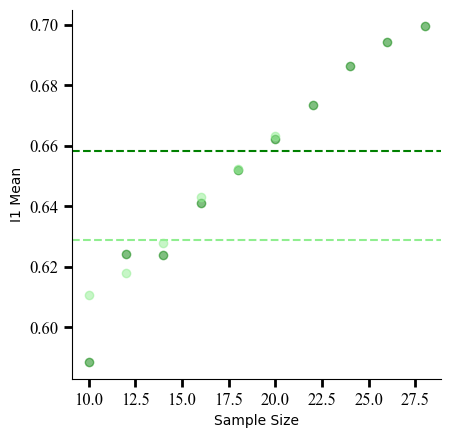

In [135]:
plt.axhline(i1_worst_m.mean(), color='green', linestyle='--', label='Worst Magneto')
plt.axhline(i1_worst_n.mean(), color='lightgreen', linestyle='--', label='Worst Nano')
for sample_size in range(10, 30, 2):
    i1s_best_m = np.load(f"./results_behavior/i1s_best_magneto_{sample_size}.npy")
    
    plt.scatter(sample_size, np.nanmean(i1s_best_m), label=f'Best Magneto {sample_size}', color='green', alpha=0.5)

for sample_size in range(10, 22, 2):
    i1s_best_n = np.load(f"./results_behavior/i1s_best_nano_{sample_size}.npy")

    plt.scatter(sample_size, np.nanmean(i1s_best_n), label=f'Best Nano {sample_size}', color='lightgreen', alpha=0.5)
plt.xlabel("Sample Size")
plt.ylabel("I1 Mean")
journal_figure()

In [ ]:
i1_best_m, _ = create_i1_i2(np.nanmean(best_neurons_m, axis=2).T)
i1_best_n, _ = create_i1_i2(np.nanmean(best_neurons_n, axis=2).T)

In [138]:
i1_best_m = np.load(f"./results_behavior/i1s_best_magneto_18.npy").mean(axis=0)
i1_best_n = np.load(f"./results_behavior/i1s_best_nano_18.npy").mean(axis=0)

In [139]:
corrs_magneto = {}
for key, item in dict_bi1.items():
    corr_best_m_corr, corr_worst_m_corr, corrs_i1_best_m, corrs_i1_worst_m = compute_all_correlations(i1_best_m, i1_worst_m, item, dict_bc[key], ceilings_magneto_best, ceilings_magneto_worst)
    corrs_magneto[key] = {}
    corrs_magneto[key]["good"] = np.array(corrs_i1_best_m)
    corrs_magneto[key]["bad"] = np.array(corrs_i1_worst_m)

corrs_nano = {}
for key, item in dict_bi1.items():
    corr_best_n_corr, corr_worst_n_corr, corrs_i1_best_n, corrs_i1_worst_n = compute_all_correlations(i1_best_n, i1_worst_n, item, dict_bc[key], ceilings_nano_best, ceilings_nano_worst)
    corrs_nano[key] = {}
    corrs_nano[key]["good"] = np.array(corrs_i1_best_n)
    corrs_nano[key]["bad"] = np.array(corrs_i1_worst_n)

In [140]:
colors=["#DC5069", "#836996", "#F8D45C", "#70BDA5"]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


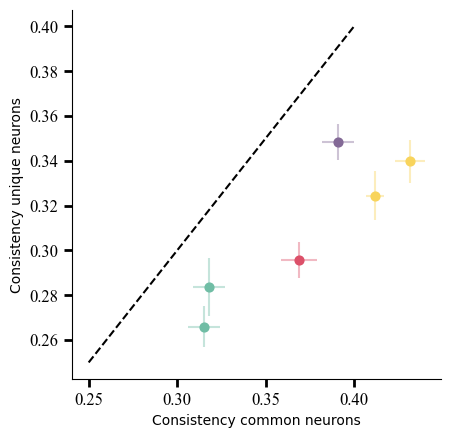

In [146]:
i=0
commons = []
uniques = []
for key, item in dict_bi1.items():
    if key == "nano":
        plt.scatter(corrs_nano[key]["good"].mean(), corrs_nano[key]["bad"].mean(), 40, marker="X" if key=="magneto" else "o", color=colors[i])
        plt.errorbar(corrs_nano[key]["good"].mean(), corrs_nano[key]["bad"].mean(), xerr=corrs_nano[key]["good"].std(), yerr=corrs_nano[key]["bad"].std(), alpha=0.4, color=colors[i])
    elif key == "magneto":
        plt.scatter(corrs_magneto[key]["good"].mean(), corrs_magneto[key]["bad"].mean(), 40, marker="X" if key=="nano" else "o", color=colors[i])
        plt.errorbar(corrs_magneto[key]["good"].mean(), corrs_magneto[key]["bad"].mean(), xerr=corrs_magneto[key]["good"].std(), yerr=corrs_magneto[key]["bad"].std(), alpha=0.4, color=colors[i])
    else:
        plt.scatter(corrs_magneto[key]["good"].mean(), corrs_magneto[key]["bad"].mean(), 40, marker="X" if key=="nano" else "o", color=colors[i])
        #plt.scatter(corrs_magneto[key]["good"].mean(), corrs_magneto[key]["bad"].mean(), 40, marker="o", color=colors[i])
        plt.scatter(corrs_nano[key]["good"].mean(), corrs_nano[key]["bad"].mean(), 40, marker="X" if key=="magneto" else "o", color=colors[i])
        #plt.scatter(corrs_nano[key]["good"].mean(), corrs_nano[key]["bad"].mean(), 40, marker="x", color=colors[i])
        plt.errorbar(corrs_magneto[key]["good"].mean(), corrs_magneto[key]["bad"].mean(), xerr=corrs_magneto[key]["good"].std(), yerr=corrs_magneto[key]["bad"].std(), alpha=0.4, color=colors[i])
        plt.errorbar(corrs_nano[key]["good"].mean(), corrs_nano[key]["bad"].mean(), xerr=corrs_nano[key]["good"].std(), yerr=corrs_nano[key]["bad"].std(), alpha=0.4, color=colors[i])
    i+=1

    commons.append(corrs_magneto[key]["good"].mean())
    uniques.append(corrs_magneto[key]["bad"].mean())
    commons.append(corrs_nano[key]["good"].mean())
    uniques.append(corrs_nano[key]["bad"].mean())
plt.plot([0.25, 0.4], [0.25, 0.4], color="black", linestyle="--")
plt.xlabel("Consistency common neurons")
plt.ylabel("Consistency unique neurons")
journal_figure()
plt.savefig("./figures/plots_v2/monkey_to_monkey_behavior_corrected_for_accuracy.eps")
plt.show()

In [147]:
stats.shapiro(commons), stats.shapiro(uniques)

(ShapiroResult(statistic=np.float64(0.9525979057940148), pvalue=np.float64(0.7373737047722568)),
 ShapiroResult(statistic=np.float64(0.891821756148065), pvalue=np.float64(0.2433174099227112)))

In [148]:
def print_ttest(commons, uniques):
    stat, p = stats.ttest_rel(commons, uniques)
    dof = len(commons) - 1
    print(f"t({dof}) = {stat}, p = {p}")

In [ ]:
print_ttest(commons, uniques)

t(7) = 8.566025248327152, p = 5.876147494702487e-05


: 

In [47]:
import distinctipy
colors = distinctipy.get_colors(len(full_model_list))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


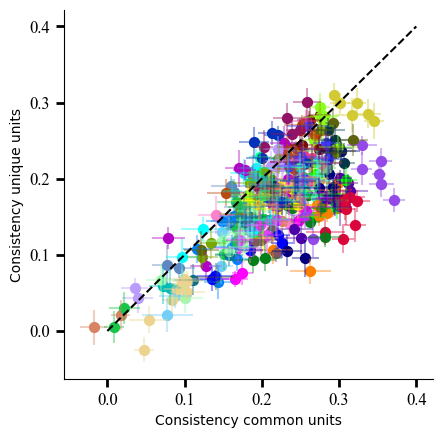

In [79]:
accs_good = []
accs_bad = []
corrs_monkey_model = {}
for monkey in ["magneto", "nano"]:
    i=0
    corrs_monkey_model[monkey] = {}
    for model in full_model_list:
        i1_good = i1s_models_monkeys[model][monkey]["good"] #.mean(axis=1)
        i1_bad = i1s_models_monkeys[model][monkey]["bad"] #.mean(axis=1)
        corrs = {}
        corrs_g = []
        corrs_b = []
        corrs_monkey_model[monkey][model] = {}
        for key, item in dict_bi1.items():
            corr_best_corr, corr_worst_corr, corrs_i1_best, corrs_i1_worst = compute_all_correlations(i1_good, i1_bad, item, dict_bc[key], 1.0, 1.0)
            corrs[key] = {}
            corrs[key]["good"] = np.array(corrs_i1_best)
            corrs[key]["bad"] = np.array(corrs_i1_worst)

            corrs_monkey_model[monkey][model][key] = {}
            corrs_monkey_model[monkey][model][key]["good"] = np.array(corrs_i1_best)
            corrs_monkey_model[monkey][model][key]["bad"] = np.array(corrs_i1_worst)

            corrs_g.append(corrs[key]["good"].mean())
            corrs_b.append(corrs[key]["bad"].mean())

            plt.scatter(corrs[key]["good"].mean(), corrs[key]["bad"].mean(), 50, marker="o", color=colors[i])
            plt.errorbar(corrs[key]["good"].mean(), corrs[key]["bad"].mean(), xerr=corrs[key]["good"].std(), yerr=corrs[key]["bad"].std(), alpha=0.4, color=colors[i])        

        i+=1


plt.plot([0., 0.4], [0., 0.4], color="black", linestyle="--")
plt.xlabel("Consistency common units")
plt.ylabel("Consistency unique units")
journal_figure()
plt.savefig("./figures/plots_v2/models_to_models_primate_behavior.eps")    
plt.show()           

In [49]:
colors=["#DC5069", "#836996", "#F8D45C", "#70BDA5"]

In [50]:
def compute_correlation_monkeys(d1, d2):
    rand_r1 = np.random.choice(20, size=20, replace=True)
    rand_r2 = np.random.choice(20, size=20, replace=True)
    corrs_i1 = [
        pearsonr(d1[:], d2[:, r2])[0]
        for r1, r2 in zip(rand_r1, rand_r2)
    ]
    mean_corr = np.nanmean(corrs_i1)
    std_corr = np.nanmean(corrs_i1)/np.sqrt(1320)

    return mean_corr, std_corr, corrs_i1

def compute_all_correlations(i1_model_best, i1_model_worst, i1_b, ceiling_b=1.0, ceiling_db=1.0, ceiling_dw=1.0): #, ceiling_b):
    corr_best_m, corr_best_std, corrs_i1_best = compute_correlation_monkeys(i1_b, i1_model_best)
    corr_worst_m, corr_worst_std, corrs_i1_worst = compute_correlation_monkeys(i1_b, i1_model_worst)

    corr_best_m_corr = corr_best_m/np.sqrt(ceiling_b*ceiling_db)
    corr_worst_m_corr = corr_worst_m/np.sqrt(ceiling_b*ceiling_dw)

    return corr_best_m_corr, corr_worst_m_corr, corrs_i1_best, corrs_i1_worst

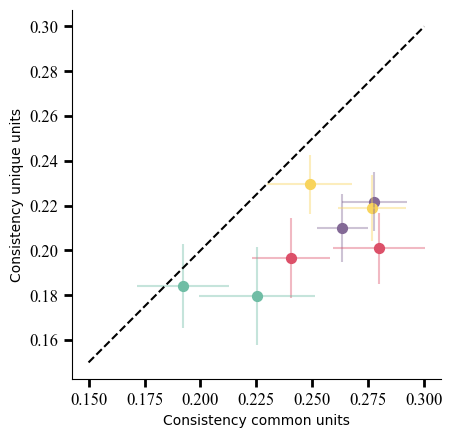

In [51]:
commons = []
uniques = []
for monkey in ["magneto", "nano"]:
    
    for model in ["resnet"]:
        i1_good = i1s_models_monkeys[model][monkey]["good"] #.mean(axis=1)
        i1_bad = i1s_models_monkeys[model][monkey]["bad"] #.mean(axis=1)
        corrs = {}
        corrs_g = []
        corrs_b = []
        i=0
        for key, item in dict_bi1.items():
            corr_best_corr, corr_worst_corr, corrs_i1_best, corrs_i1_worst = compute_all_correlations(i1_good, i1_bad, item, dict_bc[key], 1.0, 1.0)
            corrs[key] = {}
            corrs[key]["good"] = np.array(corrs_i1_best)
            corrs[key]["bad"] = np.array(corrs_i1_worst)

            corrs_g.append(corrs[key]["good"].mean())
            corrs_b.append(corrs[key]["bad"].mean())
            commons.append(corrs[key]["good"].mean())
            uniques.append(corrs[key]["bad"].mean())

            plt.scatter(corrs[key]["good"].mean(), corrs[key]["bad"].mean(), 50, marker="o", color=colors[i])
            plt.errorbar(corrs[key]["good"].mean(), corrs[key]["bad"].mean(), xerr=corrs[key]["good"].std(), yerr=corrs[key]["bad"].std(), alpha=0.4, color=colors[i])        

            i+=1


plt.plot([0.15, 0.3], [0.15, 0.3], color="black", linestyle="--")
plt.xlabel("Consistency common units")
plt.ylabel("Consistency unique units")
journal_figure()
#plt.savefig("./figures/plots_v2/resnet_to_models_primate_behavior.eps")    
plt.show()           

In [52]:
stats.shapiro(commons), stats.shapiro(uniques)

(ShapiroResult(statistic=np.float64(0.8929569979828712), pvalue=np.float64(0.24926324004755615)),
 ShapiroResult(statistic=np.float64(0.9536271338960787), pvalue=np.float64(0.7476789972932971)))

In [53]:
print_ttest(commons, uniques)

t(7) = 5.713825251207372, p = 0.0007249237395865566
The distributions are significantly different.


In [157]:
diff = np.array(commons) - np.array(uniques)
d = np.mean(diff) / np.std(diff, ddof=1)
print(f"Cohen's d = {d:.2f}")
stat, p = wilcoxon(commons, uniques, alternative='greater')
print(f"Wilcoxon test: W = {stat}, p = {p:.3f}")

Cohen's d = 2.02
Wilcoxon test: W = 36.0, p = 0.004


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


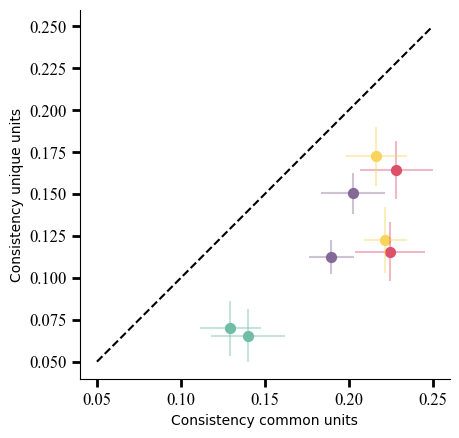

In [71]:

for monkey in ["magneto", "nano"]:
    
    for model in ["vgg16"]:
        i1_good = i1s_models_monkeys[model][monkey]["good"] #.mean(axis=1)
        i1_bad = i1s_models_monkeys[model][monkey]["bad"] #.mean(axis=1)
        corrs = {}
        corrs_g = []
        corrs_b = []
        i=0
        for key, item in dict_bi1.items():
            corr_best_corr, corr_worst_corr, corrs_i1_best, corrs_i1_worst = compute_all_correlations(i1_good, i1_bad, item, dict_bc[key], 1.0, 1.0)
            corrs[key] = {}
            corrs[key]["good"] = np.array(corrs_i1_best)
            corrs[key]["bad"] = np.array(corrs_i1_worst)

            corrs_g.append(corrs[key]["good"].mean())
            corrs_b.append(corrs[key]["bad"].mean())

            plt.scatter(corrs[key]["good"].mean(), corrs[key]["bad"].mean(), 50, marker="o", color=colors[i])
            plt.errorbar(corrs[key]["good"].mean(), corrs[key]["bad"].mean(), xerr=corrs[key]["good"].std(), yerr=corrs[key]["bad"].std(), alpha=0.4, color=colors[i])        

            i+=1


plt.plot([0.05, 0.25], [0.05, 0.25], color="black", linestyle="--")
plt.xlabel("Consistency common units")
plt.ylabel("Consistency unique units")
journal_figure()
plt.savefig("./figures/plots/vgg16_to_models_primate_behavior.eps")    
plt.show()           

In [ ]:
for monkey in ["magneto", "nano"]:
    i=0
    corrs_monkey_model[monkey] = {}
    for model in full_model_list:
        i1_good = i1s_models_monkeys[model][monkey]["good"] #.mean(axis=1)
        i1_bad = i1s_models_monkeys[model][monkey]["bad"] #.mean(axis=1)
        corrs = {}
        corrs_g = []
        corrs_b = []
        corrs_monkey_model[monkey][model] = {}
        for key, item in dict_bi1.items():
            corr_best_corr, corr_worst_corr, corrs_i1_best, corrs_i1_worst = compute_all_correlations(i1_good, i1_bad, item, dict_bc[key], 1.0, 1.0)
            corrs[key] = {}
            corrs[key]["good"] = np.array(corrs_i1_best)
            corrs[key]["bad"] = np.array(corrs_i1_worst)

            corrs_monkey_model[monkey][model][key] = {}
            corrs_monkey_model[monkey][model][key]["good"] = np.array(corrs_i1_best)
            corrs_monkey_model[monkey][model][key]["bad"] = np.array(corrs_i1_worst)

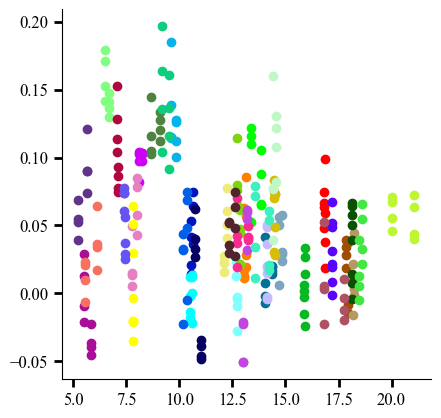

In [59]:
rp_scores = []
bhs = []
for i, model in enumerate(full_model_list):
    for monkey in ["magneto", "nano"]:
        rp_score = np.load(f'./results_predictions/monkey2model/v4/{monkey}/ev_{model}.npy')

        for key, item in dict_bi1.items():
            rp_scores.append(np.nanmean(rp_score))

            delta = corrs_monkey_model[monkey][model][key]["good"] - corrs_monkey_model[monkey][model][key]["bad"]    
            bhs.append(np.nanmean(delta))
            plt.scatter(np.nanmean(rp_score), np.nanmean(delta), color=colors[i])
        
        
journal_figure()


In [60]:
pearsonr(rp_scores, bhs), spearmanr(rp_scores, bhs)

(PearsonRResult(statistic=np.float64(-0.26412726942079523), pvalue=np.float64(2.2344859056698446e-06)),
 SignificanceResult(statistic=np.float64(-0.24230387988742758), pvalue=np.float64(1.5086713110214976e-05)))

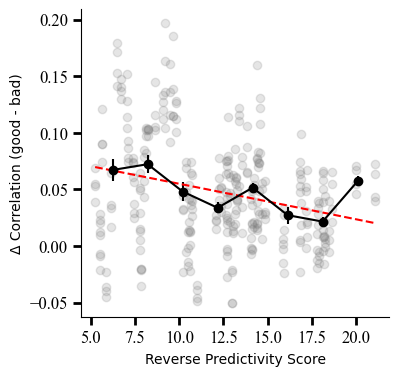

In [73]:
from scipy.stats import binned_statistic, linregress

# Convert to numpy arrays
rp_scores = np.array(rp_scores)
bhs = np.array(bhs)

# Define bins (adjust number of bins as needed)
n_bins = 8
bins = np.linspace(np.nanmin(rp_scores), np.nanmax(rp_scores), n_bins + 1)

# Compute mean and std of bhs in each rp_score bin
bin_means, _, _ = binned_statistic(rp_scores, bhs, statistic='mean', bins=bins)
bin_stds, _, _ = binned_statistic(rp_scores, bhs, statistic='std', bins=bins)
bin_counts, _, _ = binned_statistic(rp_scores, bhs, statistic='count', bins=bins)
bin_sems = bin_stds / np.sqrt(bin_counts)

# Get bin centers for plotting
bin_centers = 0.5 * (bins[1:] + bins[:-1])

degree = 2
coeffs = np.polyfit(rp_scores, bhs, degree)
poly_fn = np.poly1d(coeffs)

x_line = np.linspace(np.nanmin(rp_scores), np.nanmax(rp_scores), 200)
y_line = poly_fn(x_line)

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(rp_scores, bhs, alpha=0.2, color='gray', label='Individual points')
plt.errorbar(bin_centers, bin_means, yerr=bin_sems, fmt='-o', color='black', label='Binned mean ± SEM')
plt.plot(x_line, y_line, color='red', linestyle='--', label=f'Fit: $r$={r_value:.2f}, $p$={p_value:.3f}')


plt.xlabel('Reverse Predictivity Score')
plt.ylabel('Δ Correlation (good - bad)')
journal_figure()
plt.show()


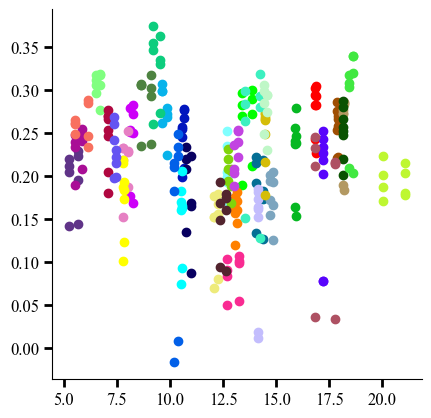

In [57]:
rp_scores = []
bhs = []
for i, model in enumerate(full_model_list):
    for monkey in ["magneto", "nano"]:
        rp_score = np.load(f'./results_predictions/monkey2model/v4/{monkey}/ev_{model}.npy')

        for key, item in dict_bi1.items():
            rp_scores.append(np.nanmean(rp_score))

            delta = corrs_monkey_model[monkey][model][key]["good"]# - corrs_monkey_model[monkey][model][key]["bad"]    
            bhs.append(np.nanmean(delta))
            plt.scatter(np.nanmean(rp_score), np.nanmean(delta), color=colors[i])
        
        
journal_figure()


In [58]:
pearsonr(rp_scores, bhs), spearmanr(rp_scores, bhs)

(PearsonRResult(statistic=np.float64(-0.057563435594674306), pvalue=np.float64(0.3108058853644309)),
 SignificanceResult(statistic=np.float64(-0.024598504136881267), pvalue=np.float64(0.6651471947730752)))

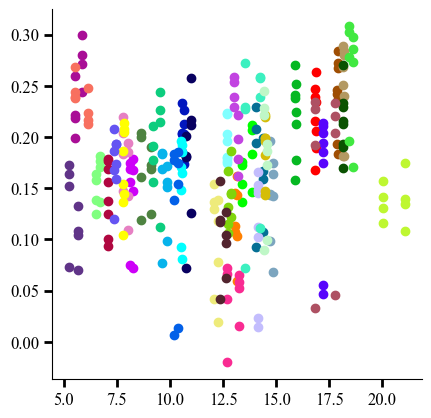

In [53]:
rp_scores = []
bhs = []
for i, model in enumerate(full_model_list):
    for monkey in ["magneto", "nano"]:
        rp_score = np.load(f'./results_predictions/monkey2model/v4/{monkey}/ev_{model}.npy')

        for key, item in dict_bi1.items():
            rp_scores.append(np.nanmean(rp_score))

            delta = corrs_monkey_model[monkey][model][key]["bad"]# - corrs_monkey_model[monkey][model][key]["bad"]    
            bhs.append(np.nanmean(delta))
            plt.scatter(np.nanmean(rp_score), np.nanmean(delta), color=colors[i])
        
        
journal_figure()


In [55]:
pearsonr(rp_scores, bhs), spearmanr(rp_scores, bhs)

(PearsonRResult(statistic=np.float64(0.1411239745079837), pvalue=np.float64(0.012587158672109695)),
 SignificanceResult(statistic=np.float64(0.1832978170179261), pvalue=np.float64(0.0011448028384024003)))

In [74]:
full_model_list

['alexnet_relu',
 'resnet18',
 'resnet18_robust',
 'resnet18_ssl',
 'resnet',
 'resnet_ssl',
 'resnet_swsl',
 'resnetSIN',
 'resnet152_2',
 'resnet101',
 'resnet101_ssl',
 'resnet_robust_eps1',
 'resnet_robust_eps3',
 'inception',
 'inceptionv1',
 'vit',
 'vit_ssl',
 'vgg16',
 'vgg16_robust',
 'densenet',
 'densenet169',
 'densenet161',
 'densenet161_robust',
 'densenet121',
 'convnext',
 'convnext_ssl',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_robust',
 'squeezenet',
 'cornetS_t0',
 'cornetS_reg',
 'cornetRT_t4',
 'nasnet',
 'pnasnet',
 'swin',
 'swin_ssl',
 'shufflenet',
 'shufflenet_robust']

In [9]:
model_match_scores = {
    "alexnet_relu": ("alexnet-baseline", ".370"),
    "resnet18": ("resnet18_imagenet_full", "0.474"),
    "resnet18_robust": ("NaN", "NaN"),
    "resnet18_ssl": ("resnet18-simclr", "0.231"),
    "resnet": ("resnet50_imagenet_full", "0.52"),
    "resnet_ssl": ("resnet50-barlow", "0.513"),
    "resnet_swsl": ("SWSL_resnet50", "0.56"),
    "resnetSIN": ("resnet50-SIN", "0.448"),
    "resnet152_2": ("resnet152_imagenet_full", "0.520"),
    "resnet101": ("resnet101_imagenet_full", "0.513"),
    "resnet101_ssl": ("NaN", "NaN"),
    "resnet_robust_eps1": ("resnet50_robust_l2_eps1", "0.485"),
    "resnet_robust_eps3": ("resnet50_robust_l2_eps3", "0.456"),
    "inception": ("inception_v3", "0.503"),
    "inceptionv1": ("inception_v1", "0.532"),
    "vit": ("ViT_B_16_imagenet1k", "0.335"),
    "vit_ssl": ("vit_large_patch14_clip_224:openai_ft_in12k_in1k", "0.558"),
    "vgg16": ("vgg_16", "0.512"),
    "vgg16_robust": ("NaN", "NaN"),
    "densenet": ("densenet-201", "0.537"),
    "densenet169": ("densenet-169", "0.476"),
    "densenet161": ("NaN", "NaN"),
    "densenet161_robust": ("NaN", "NaN"),
    "densenet121": ("densenet-121", "0.458"),
    "convnext": ("convnext_base_imagenet_full_seed-0", "0.549"),
    "convnext_ssl": ("convnext_base:clip_laiona_augreg_ft_in1k_384", "0.528"),
    "mobilenet": ("mobilenet_v1_0.75_224", "0.477"),
    "mobilenet_v2": ("mobilenet_v2_0_75_224", "0.458"),
    "mobilenet_robust": ("NaN", "NaN"),
    "squeezenet": ("squeezenet1_1", "0.291"),
    "cornetS_t0": ("CORnet-S", "0.545"),
    "cornetS_reg": ("NaN", "NaN"),
    "cornetRT_t4": ("NaN", "NaN"),
    "nasnet": ("nasnet_large", "0.491"),
    "pnasnet": ("pnasnet_large", "0.512"),
    "swin": ("swin_small_patch4_window7_224:ms_in22k_ft_in1k", "0.600"),
    "swin_ssl": ("NaN", "NaN"),
    "shufflenet": ("shufflenet_v2_x1_0", "0.500"),
    "shufflenet_robust": ("NaN", "NaN")
}


In [ ]:
rps = []
brainscores = []
for model in full_model_list:
    for monkey in ["magneto", "nano"]:
        test = corrs_monkey_model[monkey][model]["human"]["good"]
        rp_score = np.load(f'./results_predictions/monkey2model/v4/{monkey}/ev_{model}.npy')
        #brainscore = model_match_scores[model][1]
        brainscore = np.nan if model_match_scores[model][1] == "NaN" else float(model_match_scores[model][1])
        rps.append(rp_score.mean())
        brainscores.append(brainscore)
        plt.scatter(rp_score.mean(), brainscore, color="grey")

plt.xlabel("Reverse Predictivity Score")
plt.ylabel("BrainScore")
journal_figure()

In [11]:
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau

def nancorr(x, y, corr_type='pearson'):
    x = np.asarray(x)
    y = np.asarray(y)

    # Broadcast y to 2D if it's 1D
    if y.ndim == 1:
        y = y[:, np.newaxis]

    # Remove entries where x or first column of y is NaN or Inf
    valid = ~(
        np.isnan(x) |
        np.isnan(y[:, 0]) |
        np.isinf(x) |
        np.isinf(y[:, 0])
    )

    x_valid = x[valid]
    y_valid = y[valid]

    r_vals = []
    p_vals = []

    for i in range(y_valid.shape[1]):
        if corr_type == 'pearson':
            r, p = pearsonr(x_valid, y_valid[:, i])
        elif corr_type == 'spearman':
            r, p = spearmanr(x_valid, y_valid[:, i])
        elif corr_type == 'kendall':
            r, p = kendalltau(x_valid, y_valid[:, i])
        else:
            raise ValueError("Unknown correlation type: choose 'pearson', 'spearman', or 'kendall'")
        r_vals.append(r)
        p_vals.append(p)

    return np.array(r_vals), np.array(p_vals)

In [103]:
nancorr(rps, brainscores, corr_type='pearson'), nancorr(rps, brainscores, corr_type='spearman'), nancorr(rps, brainscores, corr_type='kendall')

((array([-0.40067392]), array([0.01886117])),
 (array([-0.36065891]), array([0.0361328])),
 (array([-0.26162798]), array([0.03233109])))

In [12]:
fps = []
for model in full_model_list:
    for monkey in ["magneto", "nano"]:
        out_dir = f'./results_predictions/model2monkey/{model}/v4/'
        test = corrs_monkey_model[monkey][model]["human"]["good"]
        fp_score = np.load(os.path.join(out_dir, f'ev_{monkey}.npy'))
        fps.append(fp_score.mean())
        brainscore = np.nan if model_match_scores[model][1] == "NaN" else float(model_match_scores[model][1])
        plt.scatter(fp_score.mean(), brainscore, color="grey")
        #plt.text(fp_score.mean(), brainscore, model)

plt.xlabel("Forward Predictivity Score")
plt.ylabel("BrainScore")
journal_figure()

NameError: name 'corrs_monkey_model' is not defined

In [108]:
nancorr(fps, brainscores, corr_type='pearson'), nancorr(fps, brainscores, corr_type='spearman'), nancorr(fps, brainscores, corr_type='kendall')

((array([0.26906743]), array([0.0411136])),
 (array([0.23079894]), array([0.08132185])),
 (array([0.16438241]), array([0.07186127])))

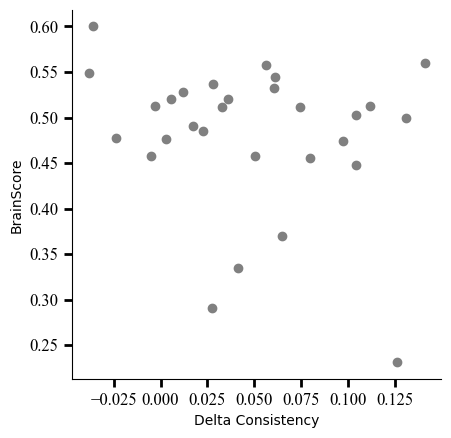

In [111]:

for model in full_model_list:
    test = corrs_monkey_model[monkey][model]["human"]["good"] - corrs_monkey_model[monkey][model]["human"]["bad"]
    brainscore = np.nan if model_match_scores[model][1] == "NaN" else float(model_match_scores[model][1])
    plt.scatter(test.mean(), brainscore, color="grey")

plt.xlabel("Delta Consistency")
plt.ylabel("BrainScore")
journal_figure()

In [4]:
import csv
import pandas as pd

In [5]:
df = pd.read_csv('benchmark_scores.csv')

In [7]:
monkey = "magneto"

alexnet-baseline
['.508']
resnet18_imagenet_full
['.520']
nan
resnet18-simclr
['.524']
resnet50_imagenet_full
['.541']
resnet50-barlow
['.574']
SWSL_resnet50
['.506']
resnet50-SIN
['.534']
resnet152_imagenet_full
['.512']
resnet101_imagenet_full
['.527']
nan
resnet50_robust_l2_eps1
['.552']
resnet50_robust_l2_eps3
['.520']
inception_v3
['.541']
inception_v1
['.483']
ViT_B_16_imagenet1k
['.408']
vit_large_patch14_clip_224:openai_ft_in12k_in1k
['.493']
vgg_16
['.512']
nan
densenet-201
['.544']
densenet-169
['.546']
nan
nan
densenet-121
['.533']
convnext_base_imagenet_full_seed-0
['.530']
convnext_base:clip_laiona_augreg_ft_in1k_384
['.528']
mobilenet_v1_0.75_224
['.535']
mobilenet_v2_0_75_224
['.532']
nan
squeezenet1_1
['.457']
CORnet-S
['.541']
nan
nan
nasnet_large
['X']
pnasnet_large
['X']
swin_small_patch4_window7_224:ms_in22k_ft_in1k
['.473']
nan
shufflenet_v2_x1_0
['.554']
nan


/var/folders/h2/8tj3snsd0wj1qzvdlg5_17y00000gn/T/ipykernel_56856/3392642411.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.scatter(fp_score.mean(), float(fp_majaj), color="grey")
/var/folders/h2/8tj3snsd0wj1qzvdlg5_17y00000gn/T/ipykernel_56856/3392642411.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fps_bs.append(float(fp_majaj))


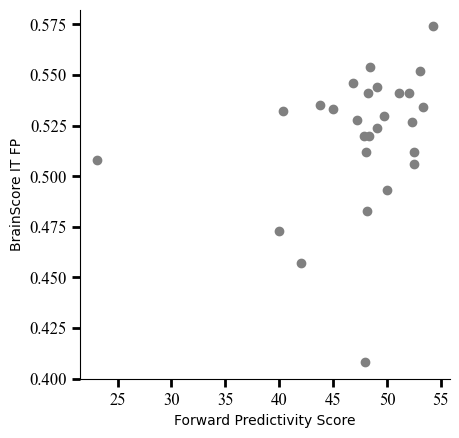

In [13]:
fps = []
fps_bs = []
for model in full_model_list:
    out_dir = f'./results_predictions/model2monkey/{model}/v4/'
    fp_score = np.load(os.path.join(out_dir, f'ev_{monkey}.npy'))
    fps.append(fp_score.mean())
    brainscore = np.nan if model_match_scores[model][1] == "NaN" else float(model_match_scores[model][1])
    key = np.nan if model_match_scores[model][0] == "NaN" else str(model_match_scores[model][0])
    print(key)
    if model_match_scores[model][0] == "NaN":
        fp_majaj = np.nan
    else:
        fp_majaj = df[df['model_name'] == key]['MajajHong2015.IT-pls'].values
        if len(fp_majaj) > 1:
            fp_majaj = fp_majaj[0]
        print(fp_majaj)

        if fp_majaj == 'X':
            fp_majaj = np.nan
        

        plt.scatter(fp_score.mean(), float(fp_majaj), color="grey")
        #plt.text(fp_score.mean(), float(fp_majaj), model)
    fps_bs.append(float(fp_majaj))

plt.xlabel("Forward Predictivity Score")
plt.ylabel("BrainScore IT FP")
journal_figure()

In [143]:
fps

[np.float64(23.100838267167884),
 np.float64(48.3474581896495),
 np.float64(40.84753313409593),
 np.float64(49.02897051253691),
 np.float64(52.038175357737984),
 np.float64(54.26870322813349),
 np.float64(52.5150516618169),
 np.float64(53.36664888529467),
 np.float64(52.50244299475938),
 np.float64(52.29833600922999),
 np.float64(52.89522961623167),
 np.float64(53.09652005375691),
 np.float64(47.832386752679525),
 np.float64(51.11707161681524),
 np.float64(48.138629551233116),
 np.float64(47.98515310719923),
 np.float64(49.998140795346636),
 np.float64(48.0700806101535),
 np.float64(32.739535197132234),
 np.float64(49.1156492604618),
 np.float64(46.840793639678914),
 np.float64(49.525256698786364),
 np.float64(43.50773150422214),
 np.float64(45.0024668671832),
 np.float64(49.75662117485214),
 np.float64(47.17560997704935),
 np.float64(43.811171561267784),
 np.float64(40.36630669590805),
 np.float64(30.6327777295415),
 np.float64(41.97489014078719),
 np.float64(48.1982449677553),
 np.fl

In [144]:
fps_bs

[0.508,
 0.52,
 nan,
 0.524,
 0.541,
 0.574,
 0.506,
 0.534,
 0.512,
 0.527,
 nan,
 0.552,
 0.52,
 0.541,
 0.483,
 0.408,
 0.493,
 0.512,
 nan,
 0.544,
 0.546,
 nan,
 nan,
 0.533,
 0.53,
 0.528,
 0.535,
 0.532,
 nan,
 0.457,
 0.541,
 nan,
 nan,
 nan,
 nan,
 0.473,
 nan,
 0.554,
 nan]

In [146]:
nancorr(fps, fps_bs, corr_type='pearson'), nancorr(fps, fps_bs, corr_type='spearman'), nancorr(fps, fps_bs, corr_type='kendall')

((array([0.27340389]), array([0.16762279])),
 (array([0.34616574]), array([0.0769329])),
 (array([0.22956114]), array([0.09495693])))

alexnet-baseline
[0.519]
resnet18_imagenet_full
[nan]
nan
resnet18-simclr
[nan]
resnet50_imagenet_full
[nan]
resnet50-barlow
[0.001]
SWSL_resnet50
[nan]
resnet50-SIN
[0.602]
resnet152_imagenet_full
[nan]
resnet101_imagenet_full
[nan]
nan
resnet50_robust_l2_eps1
[0.671]
resnet50_robust_l2_eps3
[0.533]
inception_v3
[0.735]
inception_v1
[0.662]
ViT_B_16_imagenet1k
[nan]
vit_large_patch14_clip_224:openai_ft_in12k_in1k
[0.845]
vgg_16
[0.67]
nan
densenet-201
[0.722]
densenet-169
[0.718]
nan
nan
densenet-121
[0.697]
convnext_base_imagenet_full_seed-0
[0.798]
convnext_base:clip_laiona_augreg_ft_in1k_384
[0.841]
mobilenet_v1_0.75_224
[0.684]
mobilenet_v2_0_75_224
[nan]
nan
squeezenet1_1
[0.575]
CORnet-S
[0.692]
nan
nan
nasnet_large
[0.792]
pnasnet_large
[nan]
swin_small_patch4_window7_224:ms_in22k_ft_in1k
[0.809]
nan
shufflenet_v2_x1_0
[0.643]
nan


/var/folders/h2/8tj3snsd0wj1qzvdlg5_17y00000gn/T/ipykernel_56856/777896626.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.scatter(fp_score.mean(), float(fp_majaj), color="grey")
/var/folders/h2/8tj3snsd0wj1qzvdlg5_17y00000gn/T/ipykernel_56856/777896626.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fps_bs.append(float(fp_majaj))


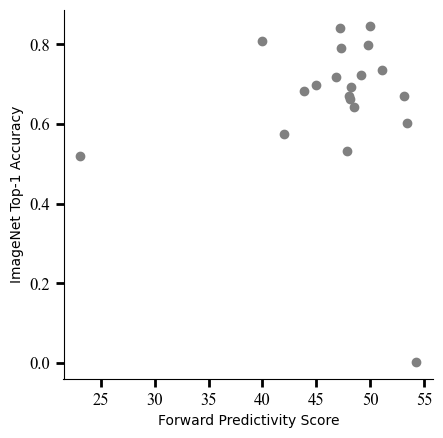

In [14]:
fps = []
fps_bs = []
for model in full_model_list:
    out_dir = f'./results_predictions/model2monkey/{model}/v4/'
    fp_score = np.load(os.path.join(out_dir, f'ev_{monkey}.npy'))
    fps.append(fp_score.mean())
    brainscore = np.nan if model_match_scores[model][1] == "NaN" else float(model_match_scores[model][1])
    key = np.nan if model_match_scores[model][0] == "NaN" else str(model_match_scores[model][0])
    print(key)
    if model_match_scores[model][0] == "NaN":
        fp_majaj = np.nan
    else:
        fp_majaj = df[df['model_name'] == key]['ImageNet-top1'].values
        if len(fp_majaj) > 1:
            fp_majaj = fp_majaj[0]
        print(fp_majaj)

        if fp_majaj == 'X':
            fp_majaj = np.nan
        

        plt.scatter(fp_score.mean(), float(fp_majaj), color="grey")
        #plt.text(fp_score.mean(), float(fp_majaj), model)
    fps_bs.append(float(fp_majaj))

plt.xlabel("Forward Predictivity Score")
plt.ylabel("ImageNet Top-1 Accuracy")
journal_figure()

In [15]:
nancorr(fps, fps_bs, corr_type='pearson'), nancorr(fps, fps_bs, corr_type='spearman'), nancorr(fps, fps_bs, corr_type='kendall')

((array([-0.04990848]), array([0.83448298])),
 (array([-0.02857143]), array([0.90482241])),
 (array([0.]), array([1.])))

In [21]:
model_match_accuracies = {
    "alexnet_relu": ("alexnet-baseline", ".153"),
    "resnet18": ("resnet18_imagenet_full", "0.698"),
    "resnet18_robust": ("resnet18_robust", "0.53"),
    "resnet18_ssl": ("resnet18-simclr", "0.726"),
    "resnet": ("resnet50_imagenet_full", "0.76"),
    "resnet_ssl": ("resnet50-barlow", "0.806"),
    "resnet_swsl": ("SWSL_resnet50", "0.8118"),
    "resnetSIN": ("resnet50-SIN", "0.602"),
    "resnet152_2": ("resnet152_imagenet_full", "0.786"),
    "resnet101": ("resnet101_imagenet_full", "0.8098"),
    "resnet101_ssl": ("resnet101_ssl", "0.85"),
    "resnet_robust_eps1": ("resnet50_robust_l2_eps1", "0.7205"),
    "resnet_robust_eps3": ("resnet50_robust_l2_eps3", "0.568"),
    "inception": ("inception_v3", "0.735"),
    "inceptionv1": ("inception_v1", "0.662"),
    "vit": ("ViT_B_16_imagenet1k", "0.7815"),
    "vit_ssl": ("vit_large_patch14_clip_224:openai_ft_in12k_in1k", "0.845"),
    "vgg16": ("vgg_16", "0.67"),
    "vgg16_robust": ("vgg16_robust", "0.5719"),
    "densenet": ("densenet-201", "0.722"),
    "densenet169": ("densenet-169", "0.718"),
    "densenet161": ("densenet161", "0.7764"),
    "densenet161_robust": ("densenet161_robust", "0.6698"),
    "densenet121": ("densenet-121", "0.697"),
    "convnext": ("convnext_base_imagenet_full_seed-0", "0.798"),
    "convnext_ssl": ("convnext_base:clip_laiona_augreg_ft_in1k_384", "0.841"),
    "mobilenet": ("mobilenet_v1_0.75_224", "0.684"),
    "mobilenet_v2": ("mobilenet_v2_0_75_224", "0.725"),
    "mobilenet_robust": ("mobilenet_robust", "0.504"),
    "squeezenet": ("squeezenet1_1", "0.575"),
    "cornetS_t0": ("CORnet-S", "0.692"),
    "cornetS_reg": ("NaN", "NaN"),
    "cornetRT_t4": ("NaN", "NaN"),
    "nasnet": ("nasnet_large", "0.792"),
    "pnasnet": ("pnasnet_large", "0.827"),
    "swin": ("swin_small_patch4_window7_224:ms_in22k_ft_in1k", "0.809"),
    "swin_ssl": ("NaN", "NaN"),
    "shufflenet": ("shufflenet_v2_x1_0", "0.643"),
    "shufflenet_robust": ("shufflenet_robust", "0.4332")
}


0.153
0.153
0.698
0.698
0.53
0.53
0.726
0.726
0.76
0.76
0.806
0.806
0.8118
0.8118
0.602
0.602
0.786
0.786
0.8098
0.8098
0.85
0.85
0.7205
0.7205
0.568
0.568
0.735
0.735
0.662
0.662
0.7815
0.7815
0.845
0.845
0.67
0.67
0.5719
0.5719
0.722
0.722
0.718
0.718
0.7764
0.7764
0.6698
0.6698
0.697
0.697
0.798
0.798
0.841
0.841
0.684
0.684
0.725
0.725
0.504
0.504
0.575
0.575
0.692
0.692
nan
nan
0.792
0.792
0.827
0.827
0.809
0.809
nan
0.643
0.643
0.4332
0.4332
0.153
0.153
0.698
0.698
0.53
0.53
0.726
0.726
0.76
0.76
0.806
0.806
0.8118
0.8118
0.602
0.602
0.786
0.786
0.8098
0.8098
0.85
0.85
0.7205
0.7205
0.568
0.568
0.735
0.735
0.662
0.662
0.7815
0.7815
0.845
0.845
0.67
0.67
0.5719
0.5719
0.722
0.722
0.718
0.718
0.7764
0.7764
0.6698
0.6698
0.697
0.697
0.798
0.798
0.841
0.841
0.684
0.684
0.725
0.725
0.504
0.504
0.575
0.575
0.692
0.692
nan
nan
0.792
0.792
0.827
0.827
0.809
0.809
nan
0.643
0.643
0.4332
0.4332


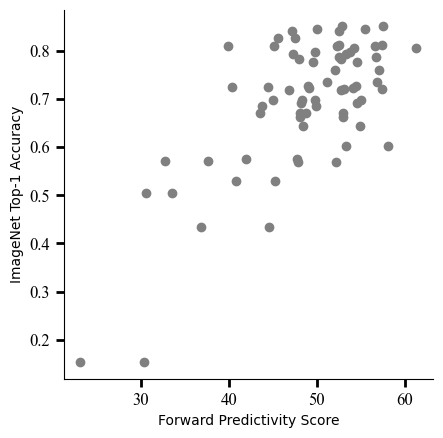

: 

In [ ]:
fps = []
ins = []
for monkey in ["magneto", "nano"]:
    for model in full_model_list:
        out_dir = f'./results_predictions/monkey2model/v4/{monkey}/'
        out_dir = f'./results_predictions/model2monkey/{model}/v4/'
        fp_score = np.load(os.path.join(out_dir, f'ev_{monkey}.npy'))
        
        fps.append(fp_score.mean())
        brainscore = np.nan if model_match_accuracies[model][1] == "NaN" else float(model_match_accuracies[model][1])
        key = np.nan if model_match_accuracies[model][0] == "NaN" else float(model_match_accuracies[model][1])
        print(key)
        if model_match_accuracies[model][0] == "NaN":
            fp_majaj = np.nan
        else:
            fp_majaj = key
            print(fp_majaj)
            

            plt.scatter(fp_score.mean(), float(fp_majaj), color="grey")
            #plt.text(fp_score.mean(), float(fp_majaj), model)
        ins.append(float(fp_majaj))

plt.xlabel("Forward Predictivity Score")
plt.ylabel("ImageNet Top-1 Accuracy")
journal_figure()

In [28]:
nancorr(fps, ins, corr_type='pearson'), nancorr(fps, ins, corr_type='spearman'), nancorr(fps, ins, corr_type='kendall')

((array([0.69126461]), array([1.79787749e-11])),
 (array([0.4561099]), array([5.66091319e-05])),
 (array([0.33412976]), array([3.72199837e-05])))

0.153
0.153
0.698
0.698
0.53
0.53
0.726
0.726
0.76
0.76
0.806
0.806
0.8118
0.8118
0.602
0.602
0.786
0.786
0.8098
0.8098
0.85
0.85
0.7205
0.7205
0.568
0.568
0.735
0.735
0.662
0.662
0.7815
0.7815
0.845
0.845
0.67
0.67
0.5719
0.5719
0.722
0.722
0.718
0.718
0.7764
0.7764
0.6698
0.6698
0.697
0.697
0.798
0.798
0.841
0.841
0.684
0.684
0.725
0.725
0.504
0.504
0.575
0.575
0.692
0.692
nan
nan
0.792
0.792
0.827
0.827
0.809
0.809
nan
0.643
0.643
0.4332
0.4332
0.153
0.153
0.698
0.698
0.53
0.53
0.726
0.726
0.76
0.76
0.806
0.806
0.8118
0.8118
0.602
0.602
0.786
0.786
0.8098
0.8098
0.85
0.85
0.7205
0.7205
0.568
0.568
0.735
0.735
0.662
0.662
0.7815
0.7815
0.845
0.845
0.67
0.67
0.5719
0.5719
0.722
0.722
0.718
0.718
0.7764
0.7764
0.6698
0.6698
0.697
0.697
0.798
0.798
0.841
0.841
0.684
0.684
0.725
0.725
0.504
0.504
0.575
0.575
0.692
0.692
nan
nan
0.792
0.792
0.827
0.827
0.809
0.809
nan
0.643
0.643
0.4332
0.4332


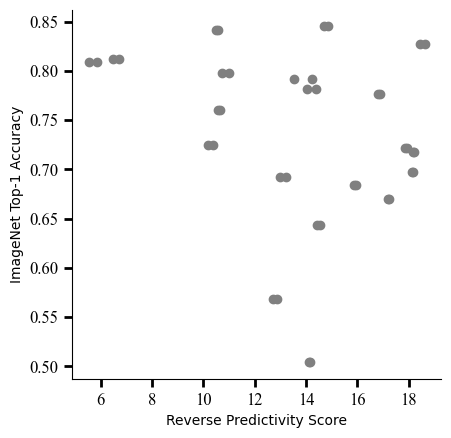

In [24]:
rps = []
ins = []
for monkey in ["magneto", "nano"]:
    for model in full_model_list:
        out_dir = f'./results_predictions/monkey2model/v4/{monkey}/'
        rp_score = np.load(os.path.join(out_dir, f'ev_{model}.npy'))
        
        rps.append(rp_score.mean())
        brainscore = np.nan if model_match_accuracies[model][1] == "NaN" else float(model_match_accuracies[model][1])
        key = np.nan if model_match_accuracies[model][0] == "NaN" else float(model_match_accuracies[model][1])
        print(key)
        if model_match_accuracies[model][0] == "NaN":
            fp_majaj = np.nan
        else:
            fp_majaj = key
            print(fp_majaj)
            

            plt.scatter(rp_score.mean(), float(fp_majaj), color="grey")
            #plt.text(fp_score.mean(), float(fp_majaj), model)
        ins.append(float(fp_majaj))

plt.xlabel("Reverse Predictivity Score")
plt.ylabel("ImageNet Top-1 Accuracy")
journal_figure()

In [25]:
nancorr(rps, ins, corr_type='pearson'), nancorr(rps, ins, corr_type='spearman'), nancorr(rps, ins, corr_type='kendall')

((array([-0.24956903]), array([0.12041075])),
 (array([-0.23924893]), array([0.13705418])),
 (array([-0.15066206]), array([0.17594116])))